<a href="https://colab.research.google.com/github/Teivak/FaceRecognitionProject/blob/main/1_HW_FaceAlignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Alignment

## Выбор датасета

В этом проекте мы будем работать с датасетом [CelebA - Original Wild Images](https://www.kaggle.com/datasets/kevinpatel04/celeba-original-wild-images). Обычно, когда говорят про CelebA имеют ввиду его кропнутую и выровненную версию, но мы будем работать с сырой.

![CelebA](https://figures.semanticscholar.org/7df4f96138a4e23492ea96cf921794fc5287ba72/6-Figure4-1.png)

Оригинальная версия датасета весит очень много: ~20 гб. Все картинки нам не будут нужны, достаточно будет ограничиться 10.000+.

Вашим первым заданием будет подготовить себе рабочий датасет. Он будет использован и в следующих заданиях, поэтому подойдите к этому очень ответственно:

- Скачайте себе датасет CelebA In a Wild любым удобным способом;
- Подумайте над тем, по каким критериям лучше всего выбирать картинки. Используйте файл с атрибутами. Обоснуйте свой выбор текстом. В случае, если обоснования выбора датасета не будет, то баллы могут быть снижены. Отнеситесь к этому серьезно: хорошая подготовка данных очень важна;
- Отберите 10.000+ изображений. Можно и больше при желании;
- При помощи атрибутов bbox'а, обрежьте картинки, чтобы на них остались только лица. При желании можно делать дополнительный кроп, так как не везде разметка идеальна, но не нужно сидеть над каждой картинкой отдельно - потратите слишком много времени;
- Сохраните отдельный csv-файл с оригинальными названиями изображений, которые были отобраны в ваш датасет. В дальнейшем он в том числе понадобится для сдачи проекта.

Несколько практических советов:
- Если решили делать дополнительный кроп изображений самостоятельно, то имейте ввиду, что ключевые точки лица в атрибутах указаны в начальной системе координат.
- Не работайте с датасетом в колабе. Простейшую работу с файлами удобнее всего делать локально на своем компьютере. Это не требует мощного железа и скачивания библиотек. Если все же пользуетесь колабом, то работайте на CPU, чтобы не лишний раз не тратить токены.
- Если есть возможность, то не удаляйте оригинальный датасет с вашего компьютера на период работы над проектом. Да, это лишняя занятая память, но зато при надобности можно будет быстро что-то изменить.
- Загрузите финальный датасет (10.000+ картинок) себе на Google Disk. Это удобнее, чем каждый раз отдельно загружать его себе в колаб сессию.

In [105]:
import kagglehub
import os
# Download latest version

path = kagglehub.dataset_download("kevinpatel04/celeba-original-wild-images")

print("Путь как датасету:", path)

Путь как датасету: /home/timof/.cache/kagglehub/datasets/kevinpatel04/celeba-original-wild-images/versions/1


In [106]:
import pandas as pd

attr_list = pd.read_csv(f'{path}/list_attr_celeba.csv')
bbox_list = pd.read_csv(f'{path}/list_bbox_celeba.csv')

In [107]:
attr_list.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [108]:
merged_df = pd.merge(attr_list, bbox_list, on='image_id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [109]:
key_attributes = ['Male', 'Smiling', 'Young', 'Eyeglasses', 'Bald', 'Bags_Under_Eyes', 'Attractive']

# Преобразуем -1/1 в 0/1 для более простой интерпретации в комбинациях
for attr in key_attributes:
    merged_df[attr] = merged_df[attr].apply(lambda x: 1 if x == 1 else 0)

# Создаем новый столбец для комбинаций атрибутов в виде строки
merged_df['attribute_combination'] = merged_df[key_attributes].astype(str).agg('_'.join, axis=1)

print("Количество значений комбинаций атрибутов:")
print(merged_df['attribute_combination'].value_counts())

Attribute combinations value counts:
attribute_combination
0_1_1_0_0_0_1    37383
0_0_1_0_0_0_1    31692
1_0_1_0_0_0_0    15190
0_0_1_0_0_0_0    14788
0_1_1_0_0_0_0     8480
                 ...  
0_0_1_1_0_1_1        1
0_0_1_1_0_1_0        1
0_0_1_0_1_0_1        1
1_1_0_1_1_0_1        1
0_1_1_1_1_0_0        1
Name: count, Length: 97, dtype: int64


In [110]:
selected_images_df = pd.DataFrame()
target_total_images = 25000

# Определяем количество уникальных комбинаций атрибутов
num_combinations = merged_df['attribute_combination'].nunique()

# Вычисляем базовое количество образцов на комбинацию для достижения целевого общего количества
# Это простое деление работает как отправная точка; фактический размер выборки будет варьироваться, если группа меньше
base_samples_per_combination = target_total_images // num_combinations

for combination, group in merged_df.groupby('attribute_combination'):
    # Выбираем либо базовое количество, либо все доступные изображения, если группа меньше
    n_samples = min(len(group), base_samples_per_combination)
    selected_images_df = pd.concat([selected_images_df, group.sample(n=n_samples, random_state=42)])


print(f"Всего изображений найдено: {len(selected_images_df)}")
print("Количиства комбинаций:")
print(selected_images_df['attribute_combination'].value_counts())

Всего изображений найдено: 14980
Количиства комбинаций:
attribute_combination
0_0_0_0_0_0_0    257
0_0_0_0_0_0_1    257
0_0_0_0_0_1_0    257
0_0_0_1_0_0_0    257
0_0_1_0_0_0_0    257
                ... 
0_0_1_1_0_1_0      1
0_0_0_1_0_1_1      1
0_1_1_1_1_0_0      1
1_1_0_1_1_0_1      1
1_0_1_1_1_0_1      1
Name: count, Length: 97, dtype: int64


In [111]:
project_path = 'PROJECT/FaceAlignment'
destination_folder = 'selected_images'
images_path = os.path.join(project_path, destination_folder)
os.makedirs(images_path, exist_ok=True)
print(f"Папка '{destination_folder}' создана или уже существует")

Папка 'selected_images' создана или уже существует


In [112]:
import shutil
from tqdm.auto import tqdm
from PIL import Image

for index, row in tqdm(selected_images_df.iterrows(), total=len(selected_images_df), desc='Обработка и сохранение изображений'):
    id = row['image_id']
    part = (int(id[:-4]) - 1) // 10000 + 1
    source_path = os.path.join(path, f'Part {part}', f'Part {part}', id)
    destination_path = os.path.join(project_path, destination_folder, id)
    if os.path.exists(os.path.join(destination_path)):
        continue
    try:
        img = Image.open(source_path)
        # Получаем координаты ограничивающего прямоугольника
        x1, y1, width, height = row['x_1'], row['y_1'], row['width'], row['height']
        x2, y2 = x1 + width, y1 + height

        # Обрезаем изображение
        cropped_img = img.crop((x1, y1, x2, y2))

        # Сохраняем обрезанное изображение
        cropped_img.save(destination_path)
    except FileNotFoundError:
        print(f"Изображение не найдено в {source_path}. Пропуск.")

print(f"Изображения сохранены в {destination_folder}")

Обработка и сохранение изображений:   0%|          | 0/14980 [00:00<?, ?it/s]

Изображения сохранены в selected_images


In [113]:
landmarks_df = pd.read_csv('PROJECT/FaceAlignment/landmarks.csv')

In [114]:
merged_landmarks_df = pd.merge(selected_images_df, landmarks_df, on='image_id', how='inner')
merged_landmarks_df.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  163224.jpg                -1                1           0                0   
1  009355.jpg                -1               -1           0                0   
2  091594.jpg                -1               -1           0                0   
3  130527.jpg                -1               -1           0                0   
4  110471.jpg                -1               -1           0                0   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  lefteye_x  lefteye_y  \
0     0      1        -1        -1          -1  ...        404        302   
1     0      1        -1         1          -1  ...        192         86   
2     0     -1        -1        -1          -1  ...        537        119   
3     0      1        -1        -1          -1  ...         73         62   
4     0     -1        -1         1          -1  ...        645        161   

   righteye_x  righteye_y  nose_x  nose_y  leftmouth_x  leftmouth_y  \
0         482         290     436     351          419          396   
1         238          80     202      97          190          134   
2         588         123     560     148          539          175   
3          96          64      93      77           75           90   
4         710         161     670     194          648          217   

   rightmouth_x  rightmouth_y  
0           488           384  
1           231           132  
2           578           179  
3            96            91  
4           710           225  

[5 rows x 56 columns]

In [115]:
import matplotlib.pyplot as plt
import random


def check_landmarks(num_images=1, pred_landmarks=None):
    random_images = merged_landmarks_df.sample(n=num_images)

    for i, (index, row) in enumerate(random_images.iterrows()):
        image_id = row['image_id']
        image_path = os.path.join(images_path, image_id)
        # Загрузка обрезанного изображения
        img = Image.open(image_path)

        # Получение исходных координат ограничивающего прямоугольника
        x1_orig, y1_orig = row['x_1'], row['y_1']

        # Получение координат ключевых точек
        true_landmarks = [
            (row['lefteye_x'], row['lefteye_y']),
            (row['righteye_x'], row['righteye_y']),
            (row['nose_x'], row['nose_y']),
            (row['leftmouth_x'], row['leftmouth_y']),
            (row['rightmouth_x'], row['rightmouth_y'])
        ]

        # Корректировка координат ключевых точек относительно углов обрезанного изображения
        adjusted_true_landmarks = [(lx - x1_orig, ly - y1_orig) for lx, ly in true_landmarks]

        # Построение изображения и ключевых точек
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.title(image_id)
        plt.axis('off')

        # Наложение настоящих ключевых точек
        for lx, ly in adjusted_true_landmarks:
            plt.scatter(lx, ly, c='red', s=10, alpha=0.8)

        # Наложение предсказанных ключевых точек (не доделано)
        if pred_landmarks != None:
            for lx, ly in pred_landmarks:
                plt.scatter(lx, ly, c='green', s=10, alpha=0.8)

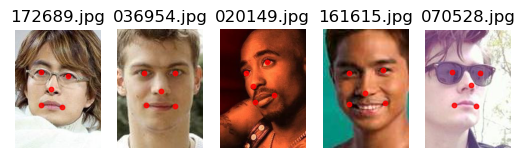

In [116]:
check_landmarks(5)

## Архитектура Stacked Hourglass Network

В разных вариантах пайплайна для распознавания лиц ключевые точки лица могут предсказываться сразу детектором (MTCNN, RetinaFace и прочие), а могут и отдельной моделью. В этом проекте рассматривается второй вариант. То есть, за детекцию ключевых точек будет отвечать отдельная модель.

**Hourglass** — это U-Net-подобная структура, которая сначала уменьшает разрешение изображения, затем восстанавливает его обратно. Такая структура напоминает по форме песочные часы (hourglass).

**Stacked Hourglass Network** состоит Hourglass-блоков, каждый из которых старается уточнять результат предыдущего. Несмотря на то, что она придумана в 2016 году, до сих пор используется во многих исследовательских проектах для задачи обнаружения ключевых точек.

![image](https://img2018.cnblogs.com/blog/900393/201907/900393-20190722093153502-1808128161.png)

### Hourglass module

Посмотрим подробнее на структуру **отдельного Hourglass-блока**

![retrt](https://curt-park.github.io/images/stacked_hourglass_networks/fig3.png)

Каждый бокс в этой схеме - это Residual block, который отвечает за извлечение признаков на разных уровнях детализации (вспоминаем про ResNet). Причем, каждый такой блок имеет одинаковую размерность на входе и на выходе.

Downsampling и upsampling можно делать разными способами.

*   Для Downsampling: nn.MaxPool2d или nn.Conv2d
*   Для Upsampling: nn.Upsample или nn.ConvTranspose2d

Основная разница: maxpool и upsample - необучаемые слои в отличие от сверток. Это может как быть как минусом, так и плюсом: чем больше параметров - тем медленее идет процесс обучения (при этом не факт, что результаты будут лучше).

То есть, идейно все практически также как было в U-net: полностью симметричная архитектура, сначала идет преобразование в более низкоразмерное пространство, а потом декодирование обратно с пробросами результатов из соотвествующих слоев энкодера. Разница лишь в том, что теперь каждый кирпичик - это Residual block.

А вот реализация ResidualBlock вам в помощь!

Но можете ее править под себя, если очень хочется.

In [117]:
from torch import nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.skip = nn.Identity() if in_channels == out_channels else nn.Conv2d(in_channels, out_channels, 1)

        self.conv1 = nn.Conv2d(in_channels, out_channels // 2, 1)
        self.bn1 = nn.BatchNorm2d(out_channels // 2)
        self.conv2 = nn.Conv2d(out_channels // 2, out_channels // 2, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels // 2)
        self.conv3 = nn.Conv2d(out_channels // 2, out_channels, 1)
        self.bn3 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = self.skip(x)
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.bn3(self.conv3(x))
        return self.relu(x + residual)

При построении архитектуры Hourglass-блоков **не обязательно полностью повторять архитектуру**, которая представлена на картинке из статьи. Вы можете добавлять больше или меньше модулей, некоторые блоки вообще можно не использовать. В целом, это творческая задача и вы вольны делать так, как вам самим хочется. **Главное - чтобы ваша реализация соотвествовала изначальной идее Hourglass, и итоговые результаты были достаточно хорошими.**

### Stacked Hourglass Network

Как и было сказано ранее, Stacked Hourglass - это набор одинаковых Hourglass блоков (см. схематический рисунок в начале ноутбука). Но что это за блок между каждыми двумя Hourglass? Чтобы ответить на этот вопрос, нужно сначала разобраться с тем, что мы будем получать на выходе такой нейронной сети.

Предсказывать ключевые точки лица можно поразному. Есть два основных подхода:

1.   Регрессия - предсказывает координаты точек лица напрямую -> $(N, x, y)$.
2.   Heatmap - предсказывает карту вероятностей на выходе, а наиболее подходящие точки находятся через argmax

Не вдваясь в подробности, можно просто сказать, что Heatmap-подход показал себя лучше из-за своей устойчивости к шумам и начальным условиям. В качестве функции потерь в таком случае используют обычный **MSE loss**.

В Stacked Hourglass **используется именно heatmap-подход**. И на выходе каждого Hourglass-блока находится слой (голова), который создает heatmap нужного размера. Обычно это какие-то стандартные варианты по типу *Conv -> BatchNorm -> Relu -> Conv* или просто *Conv*. Каждая heatmap'a прокидывается на следующую голову, и они суммируются, и так, пока слои не закончатся.

Такой подход нужен для реализации **Intermediate Supervision**. Если говорить простыми словами, то это такой вариант обучения нейронной сети, когда мы подсчитываем лосс не только по финальному выходу сети, а также на некоторых промежуточных слоях (головах). Градиенты в этом случае тоже распространяются не только через последний выход, но и через промежуточные уровни. Эти головы не влияют на финальное предсказание напрямую, но помогают модели быстрее и лучше учиться. На практике это означет следующее:

Нужно посчитать лосс (таргет для всех одинаковый) для каждой головы отдельно, а потом просуммировать. Далее Pytorch сам построит за вас весь граф вычислений и правильно запустит везде градиенты. В коде это выглядит так:

```
outputs = model(image)  # outputs — список из N heatmaps от разных голов
losses = [loss_function(output, target) for output in outputs]
total_loss = sum(losses)
total_loss.backward()
optimizer.step()
```

Подведем **итоги по архитектуре**.

Stacked Hourglass состоит из Hourglass-блоков, после каждого такого блока идет голова, которая предсказывает heatmap'у. Каждая heatmap'а суммируется с предыдущей. Градиенты при обучении текут с каждой головы, а не только через последний выход сети.

Подробно про Stacked Hourglass Network можно прочитать в [оригинальной статье](https://arxiv.org/pdf/1603.06937).

## Подготовка датасета для обучения

На этом этапе у вас уже должен быть готовый датасет на основе CelebA In A Wild.

В разметке CelebA всего 5 точек:

1.   Левый глаз
2.   Правый глаз
3.   Нос
4.   Левый уголок рта
5.   Правый уголок рта


Единственная проблема заключается в том, что разметка - это именно точки, а не heatmap'ы. Но можно их сгенерировать самостоятельно при помощи гауссовского распределения вокруг размеченных точек. Вот вам функции в помощь. Можете их тоже редактивовать под себя, если нужно.

In [118]:
def create_heatmap(size, landmark, sigma=2):
    """
    Создаёт один heatmap с гауссовым ядром вокруг точки.

    :param size: (height, width) — размер heatmap'а
    :param landmark:(x, y) — координаты точки
    :param sigma
    :return: heatmap массив
    """
    x, y = landmark
    h, w = size

    # Обрезаем координаты, чтобы не выйти за пределы изображения
    x = min(max(0, int(x)), w - 1)
    y = min(max(0, int(y)), h - 1)

    xx, yy = np.meshgrid(np.arange(w), np.arange(h))
    heatmap = np.exp(-((yy - y)**2 + (xx - x)**2) / (2 * sigma**2))
    return heatmap


def landmarks_to_heatmaps(image_shape, landmarks, sigma=2):
    """
    Преобразует список из N точек в набор из N heatmap'ов.

    :param image_shape: исходный размер изображения (H, W)
    :param landmarks: список из N пар координат [(x1, y1), (x2, y2), ..., (xN, yN),]
    :param sigma:
    :return: массив heatmap'ов вида [N, H, W]
    """
    heatmaps = []

    for (x, y) in landmarks:
        hm = create_heatmap(image_shape, landmark=(x,y), sigma=sigma)
        heatmaps.append(hm)

    return np.array(heatmaps)

## Выравнивание по предсказанным точкам

Существует множество вариантов, как по полученным точкам правильно преобразовать картинку. Главное, что вам нужно понимать - **это задача классического компьютерного зрения** и решается при помощи математики, без нейронок. Вдаваться в подробности конкретных алгоритмов мы не будем.

Можно использовать аффинное преобразование, тогда потребуется только 3 точки, можно, например, искать матрицу гомографии, где может быть использовано больше точек, а может быть, есть еще что-то. Реализовывать эти алгоритмы самим не нужно. Достаточно провести небольшой ресерч и найти готовое решение (но **не готовую нейронку для выравнивания**), лишь бы оно работало. Количество используемых точек тоже выбирайте сами, подойдет любой вариант. Условный ориентир для поиска - библиотека **opencv**. Обязательно приведите примеры того, как работает ваш алгоритм.

# План заданий

По итогу, в этом блоке у вас следующие задачи:

*   Подготовить датасет, сохранить файл с оригинальными названиями изображений
*   Реализовать Hourglass блок
*   Реализовать Stacked Hourglass
*   Преобразовать точки лица в Heatmap'ы
*   Обучить Stacked Hourglass
*   Найти функцию, которая по предсказанным ключевым точкам выравнивает лица на картинке (face alignment)
*   Подготовить датасет с кропнутыми и выровненными лицами для следующего этапа

**P.S. Не забывайте сохранять модели после обучения и выводите промежуточные результаты на экран**



**Удачи! У вас всё получится 💗!**



> ***Спасибо)***



# **Реализация Stacked Hourglass Network**

In [119]:
class HourglassModule(nn.Module):
    def __init__(self, depth, in_channels, out_channels):
        super().__init__()
        self.depth = depth # Глубина текущего Hourglass модуля (количество рекурсивных вложений)
        self.in_channels = in_channels # Количество входных каналов
        self.out_channels = out_channels # Количество выходных каналов

        # 1. Начальный ResidualBlock:
        # Принимает входные признаки и преобразует их. Его выход будет использован для skip-connection.
        self.res1 = ResidualBlock(in_channels, out_channels)

        # 2. Слой Downsampling:
        # Уменьшает пространственное разрешение признаков в 2 раза. Это начало "сжимающей" частиhourglass-модуля.
        self.downsample = nn.MaxPool2d(kernel_size=2)

        # 3. ResidualBlock после Downsampling:
        # Обрабатывает признаки после уменьшения разрешения.
        self.res2 = ResidualBlock(out_channels, out_channels)

        # 4. Рекурсивная часть или базовый случай:
        # Если глубина > 1, то внутри этого Hourglass модуля находится еще один Hourglass модуль (рекурсия).
        # Это формирует вложенную структуру "песочных часов".
        # Если глубина = 1 (базовый случай), то используется обычный ResidualBlock на дне архитектуры.
        if depth > 1:
            self.recursive_hg = HourglassModule(depth - 1, out_channels, out_channels)
        else:
            self.bottom_res = ResidualBlock(out_channels, out_channels)

        # 5. Слой Upsampling:
        # Увеличивает пространственное разрешение признаков обратно в 2 раза, восстанавливая их размер.
        # Используется mode='nearest' для простого увеличения (без обучения параметров).
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')

        # 6. Финальный ResidualBlock:
        # Обрабатывает объединенные признаки после upsampling и skip-connection.
        self.res3 = ResidualBlock(out_channels, out_channels)

    def forward(self, x):
        # 1. Проход через первый ResidualBlock:
        # `skip_connection` сохраняет признаки до downsampling, чтобы позже объединить их с upsampled-признаками (как в U-Net).
        skip_connection = self.res1(x)

        # 2. Downsample:
        # Уменьшаем пространственное разрешение признаков.
        down = self.downsample(skip_connection)

        # 3. Проход через второй ResidualBlock:
        # Обрабатываем признаки после downsample.
        down_res = self.res2(down)

        # 4. Рекурсивный вызов или базовый ResidualBlock:
        # Если `depth > 1`, вызываем вложенный HourglassModule. Это углубляет сеть.
        # Если `depth = 1`, это самый глубокий уровень, и мы просто используем `bottom_res`.
        if self.depth > 1:
            bottom_out = self.recursive_hg(down_res)
        else:
            bottom_out = self.bottom_res(down_res)

        # 5. Upsample:
        # Увеличиваем пространственное разрешение признаков обратно.
        up = self.upsample(bottom_out)

        # 6. Объединение признаков:
        # Здесь происходит ключевое объединение признаков: upsampled-признаки суммируются
        # с признаками из `skip_connection`. Это помогает модели сохранять детали, потерянные
        # при downsampling, и обеспечивает контекст из разных уровней разрешения.
        # Пространственные размеры `up` и `skip_connection` должны совпадать после MaxPool2d и Upsample(scale_factor=2).
        combined_features = up + skip_connection

        # 7. Финальный ResidualBlock:
        # Последняя обработка объединенных признаков перед выходом из текущего Hourglass модуля.
        output = self.res3(combined_features)

        return output

In [120]:
class HourglassHead(nn.Module):
    def __init__(self, in_channels, num_landmarks):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, num_landmarks, kernel_size=1)
        self.bn = nn.BatchNorm2d(num_landmarks)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

In [121]:
class StackedHourglassNetwork(nn.Module):
    def __init__(self, num_stacks, depth, in_channels, out_channels, num_landmarks):
        super().__init__()
        self.num_stacks = num_stacks
        self.num_landmarks = num_landmarks

        # Входные данные: (batch_size, 3, 128, 128)
        self.preprocess = nn.Sequential(
            # Conv2d: (batch_size, 64, 128, 128)
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            # ResidualBlock: (batch_size, 128, 128, 128)
            ResidualBlock(64, 128),
            # MaxPool2d: (batch_size, 128, 64, 64)
            nn.MaxPool2d(kernel_size=2),
            # ResidualBlock: (batch_size, in_channels, 64, 64)
            ResidualBlock(128, in_channels)
        )
        # Выход preprocess: (batch_size, in_channels, 64, 64)

        self.hourglass_modules = nn.ModuleList([
            # HourglassModule: (batch_size, in_channels, 64, 64) -> (batch_size, out_channels, 64, 64)
            HourglassModule(depth, in_channels, out_channels) for _ in range(num_stacks)
        ])

        self.heads = nn.ModuleList([
            # HourglassHead: (batch_size, out_channels, 64, 64) -> (batch_size, num_landmarks, 64, 64)
            HourglassHead(out_channels, num_landmarks) for _ in range(num_stacks)
        ])

        # Промежуточные слои для intermediate supervision
        self.intermediate_convs_features = nn.ModuleList()
        self.intermediate_convs_heatmaps = nn.ModuleList()

        for i in range(num_stacks - 1):
            # Conv2d: (batch_size, out_channels, 64, 64) -> (batch_size, in_channels, 64, 64)
            self.intermediate_convs_features.append(nn.Conv2d(out_channels, in_channels, kernel_size=1))
            # Conv2d: (batch_size, num_landmarks, 64, 64) -> (batch_size, in_channels, 64, 64)
            self.intermediate_convs_heatmaps.append(nn.Conv2d(num_landmarks, in_channels, kernel_size=1))

    def forward(self, x):
        # Начальная обработка
        # x_in: (batch_size, 3, 128, 128)
        x = self.preprocess(x) # x: (batch_size, in_channels, 64, 64)

        outputs = []
        for i in range(self.num_stacks):
            # Вход для HourglassModule: (batch_size, in_channels, 64, 64)
            hg_out = self.hourglass_modules[i](x) # hg_out: (batch_size, out_channels, 64, 64)

            # Вход для HourglassHead: (batch_size, out_channels, 64, 64)
            heatmap_out = self.heads[i](hg_out) # heatmap_out: (batch_size, num_landmarks, 64, 64)
            outputs.append(heatmap_out)

            # Для промежуточных стеков
            if i < self.num_stacks - 1:
                # Преобразование карты признаков в признаки: (batch_size, num_landmarks, 64, 64) -> (batch_size, in_channels, 64, 64)
                heatmap_to_features = self.intermediate_convs_heatmaps[i](heatmap_out)
                # Преобразование выхода HG в признаки: (batch_size, out_channels, 64, 64) -> (batch_size, in_channels, 64, 64)
                hg_out_to_features = self.intermediate_convs_features[i](hg_out)
                # Суммирование признаков: (batch_size, in_channels, 64, 64)
                x = x + hg_out_to_features + heatmap_to_features
                # 'x' для следующего стека: (batch_size, in_channels, 64, 64)

        return outputs # Список карт признаков: (batch_size, num_landmarks, 64, 64)

In [122]:
import numpy as np

def create_heatmap(size, landmark, sigma=2):
    """
    Создаёт один heatmap с гауссовым ядром вокруг точки.

    :param size: (height, width) — размер heatmap'а
    :param landmark:(x, y) — координаты точки
    :param sigma
    :return: heatmap массив
    """
    x, y = landmark
    h, w = size

    # Обрезаем координаты, чтобы не выйти за пределы изображения
    x = min(max(0, int(x)), w - 1)
    y = min(max(0, int(y)), h - 1)

    xx, yy = np.meshgrid(np.arange(w), np.arange(h))
    heatmap = np.exp(-((yy - y)**2 + (xx - x)**2) / (2 * sigma**2))
    return heatmap


def landmarks_to_heatmaps(image_shape, landmarks, sigma=2):
    """
    Преобразует список из N точек в набор из N heatmap'ов.

    :param image_shape: исходный размер изображения (H, W)
    :param landmarks: список из N пар координат [(x1, y1), (x2, y2), ..., (xN, yN),]
    :param sigma:
    :return: массив heatmap'ов вида [N, H, W]
    """
    heatmaps = []

    for (x, y) in landmarks:
        hm = create_heatmap(image_shape, landmark=(x,y), sigma=sigma)
        heatmaps.append(hm)

    return np.array(heatmaps)


import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class FaceLandmarksDataset(Dataset):
    def __init__(self, df, images_path, target_image_size=(128, 128), transform=None):
        self.df = df
        self.images_path = images_path
        self.target_image_size = target_image_size # Новый фиксированный размер

        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize(target_image_size), # Изменяем размер изображений до фиксированного размера
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ])
        else:
            # Убедитесь, что изменение размера является частью любого пользовательского преобразования. Если предоставлено пользовательское преобразование,
            # предполагается, что оно обрабатывает изменение размера, или пользователь добавит его. Пока по умолчанию добавляем его.
            self.transform = transforms.Compose([
                transforms.Resize(target_image_size),
                transform
            ])

    def __len__(self):
        return len(self.df)

    def _get_image(self, image_id):
        image_full_path = os.path.join(self.images_path, image_id)
        try:
            image = Image.open(image_full_path).convert('RGB')
            return image
        except FileNotFoundError:
            print(f'Путь не найден. Возможно файла "{image_id}" не существует. Пропускаем изображение.')
            return None

    def _get_landmarks(self, row, adjusted=False):
        original_landmarks_abs = [
            (row['lefteye_x'], row['lefteye_y']),
            (row['righteye_x'], row['righteye_y']),
            (row['nose_x'], row['nose_y']),
            (row['leftmouth_x'], row['leftmouth_y']),
            (row['rightmouth_x'], row['rightmouth_y'])
        ]
        if adjusted:
            x1_orig, y1_orig = row['x_1'], row['y_1']
            original_bbox_width, original_bbox_height = row['width'], row['height']

            # Обрабатываем случаи, когда ширина или высота могут быть нулевыми, чтобы избежать деления на ноль
            if original_bbox_width == 0 or original_bbox_height == 0:
                print(f"Предупреждение: Ограничивающая рамка для {row['image_id']} имеет нулевую ширину или высоту. Пропускаем корректировку ориентиров.")
                return [(0,0)] * len(original_landmarks_abs) # Возвращаем фиктивные ориентиры или обрабатываем как ошибку

            scale_x = self.target_image_size[1] / original_bbox_width
            scale_y = self.target_image_size[0] / original_bbox_height

            adjusted_landmarks = []
            for lx_orig_abs, ly_orig_abs in original_landmarks_abs:
                # Ориентиры относительно верхнего левого угла *обрезанного* исходного изображения
                lx_relative_to_crop = lx_orig_abs - x1_orig
                ly_relative_to_crop = ly_orig_abs - y1_orig

                # Масштабируем ориентиры до новых фиксированных размеров изображения
                lx_scaled = lx_relative_to_crop * scale_x
                ly_scaled = ly_relative_to_crop * scale_y
                adjusted_landmarks.append((int(round(lx_scaled)), int(round(ly_scaled))))
            return adjusted_landmarks
        else:
            return original_landmarks_abs

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_id = row['image_id']

        image = self._get_image(image_id)
        if image is None:
            return None # Пропускаем этот образец, если загрузка изображения не удалась

        # Получаем ориентиры, скорректированные до размера *входного изображения* (128x128)
        adjusted_landmarks_for_input_image = self._get_landmarks(row, adjusted=True)
        # Убедитесь, что ориентиры действительны (например, не все (0,0) из-за ошибки)
        if not adjusted_landmarks_for_input_image or all(lm == (0,0) for lm in adjusted_landmarks_for_input_image):
            print(f"Предупреждение: Пропускаем {image_id} из-за недопустимых ориентиров.")
            return None

        # Применяем преобразование изображения
        transformed_image = self.transform(image)

        # Определяем целевой размер карты активации (пространственное измерение вывода модели)
        # Блок предварительной обработки модели включает MaxPool2d(kernel_size=2), поэтому выходные карты активации имеют размер 64x64
        heatmap_target_h, heatmap_target_w = 64, 64
        input_image_h, input_image_w = self.target_image_size # (128, 128)

        # Масштабируем ориентиры от размера входного изображения (128x128) до размера карты активации (64x64)
        scale_factor_h = heatmap_target_h / input_image_h
        scale_factor_w = heatmap_target_w / input_image_w

        scaled_landmarks_for_heatmap = []
        for lx, ly in adjusted_landmarks_for_input_image:
            scaled_landmarks_for_heatmap.append((int(round(lx * scale_factor_w)), int(round(ly * scale_factor_h))))

        # Генерируем карты активации с использованием глобальной функции landmarks_to_heatmaps
        heatmaps_np = landmarks_to_heatmaps((heatmap_target_h, heatmap_target_w), scaled_landmarks_for_heatmap)
        heatmaps_tensor = torch.from_numpy(heatmaps_np).float()

        # Преобразуем скорректированные ориентиры в тензор (для прямой потери ориентиров, если необходимо, или построения графиков)
        # Сохраняем эти ориентиры, масштабированные до размера входного изображения (128x128), для корректного построения на исходном изображении.
        adjusted_landmarks_tensor = torch.tensor(adjusted_landmarks_for_input_image).float()

        return transformed_image, heatmaps_tensor, adjusted_landmarks_tensor


#_________________________________________________________________________________


# Пользовательская функция custom_collate_fn для фильтрации None-образцов
def custom_collate_fn(batch):
    # Отфильтровываем None-образцы (например, неудачная загрузка изображения)
    batch = [item for item in batch if item is not None]
    if not batch:
        return None # Возвращаем None или пустой список, если пакет пуст после фильтрации
    return torch.utils.data.dataloader.default_collate(batch)

# Создаем экземпляр датасета
# Убедитесь, что `merged_landmarks_df` и `images_path` доступны из предыдущих ячеек
fixed_image_size = (128, 128) # Определяем фиксированный размер для всех изображений
face_landmarks_dataset = FaceLandmarksDataset(merged_landmarks_df, images_path, target_image_size=fixed_image_size)

# Создаем экземпляр DataLoader
batch_size = 16 # Определяем желаемый размер батча
dataloader = DataLoader(face_landmarks_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate_fn, num_workers=0) # Изменено num_workers на 0

print(f"FaceLandmarksDataset и DataLoader созданы с размером батча {batch_size}. Все изображения будут изменены до размера {fixed_image_size}")

FaceLandmarksDataset and DataLoader created with batch size 16. All images will be resized to (128, 128)


Visualizing a single sample from the dataset with true landmarks and heatmaps...


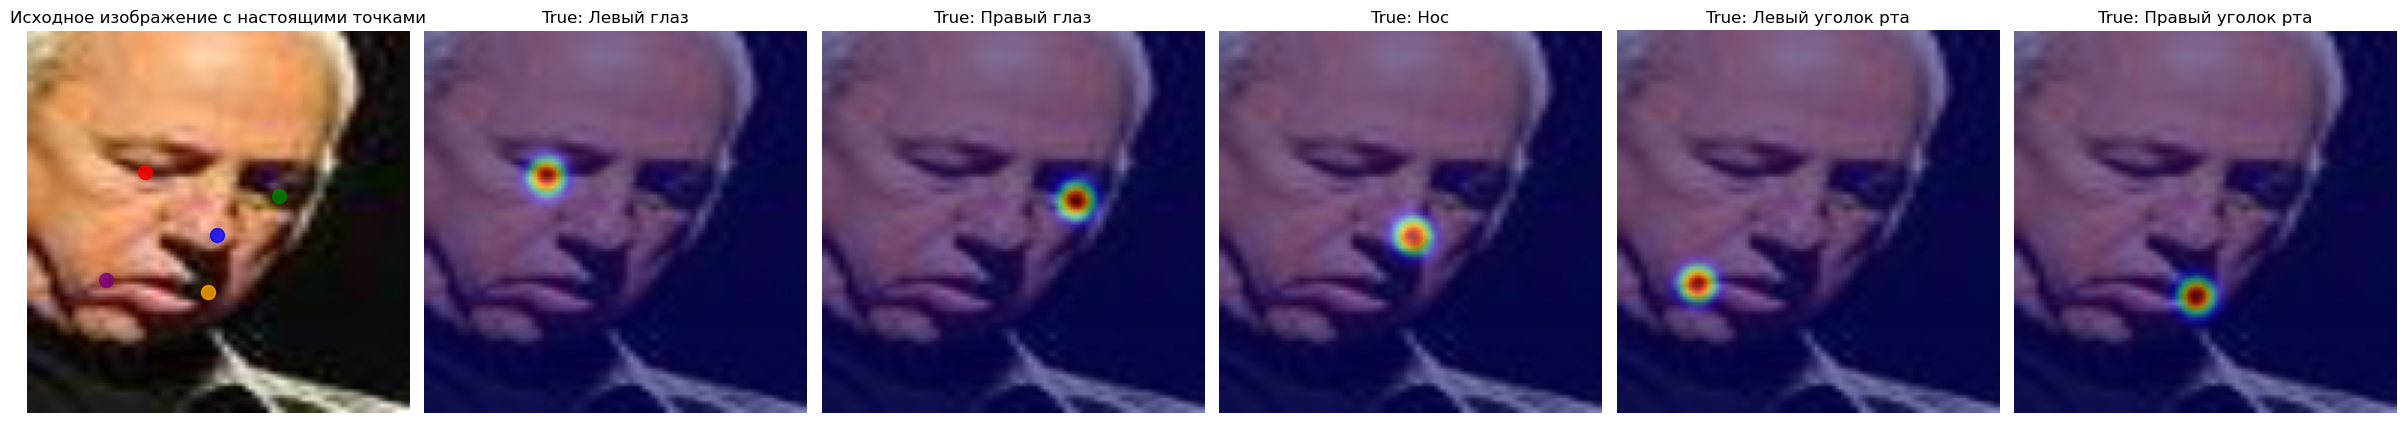

In [123]:
LANDMARK_COLORS = ['red', 'green', 'blue', 'purple', 'orange']

def plot_single_sample_with_heatmaps(dataloader):
    """
    Визуализирует один образец из FaceLandmarksDataset с наложенными
    истинными ключевыми точками и отдельными истинными тепловыми картами.

    :param dataloader: DataLoader для FaceLandmarksDataset.
    """
    # Получаем один батч из загрузчика данных
    batch_data = None
    for item in dataloader:
        if item is not None:
            batch_data = item
            break
    if batch_data is None:
        print("No valid samples found in the dataloader.")
        return

    images, true_heatmaps_batch, true_landmarks_batch = batch_data

    # Берем первый образец из батча
    image_tensor = images[0].cpu()
    true_heatmaps = true_heatmaps_batch[0].cpu() # Форма: [num_landmarks, H, W]
    true_landmarks = true_landmarks_batch[0].cpu().numpy() # Форма: [num_landmarks, 2]

    num_landmarks = true_heatmaps.shape[0]

    # Денормализация изображения для отображения
    mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
    display_image_np = image_tensor.numpy() * std + mean
    display_image_np = np.clip(display_image_np.transpose(1, 2, 0), 0, 1) # Преобразование в (H, W, C)

    landmark_names = [
        "Левый глаз",
        "Правый глаз",
        "Нос",
        "Левый уголок рта",
        "Правый уголок рта"
    ]

    fig = plt.figure(figsize=((num_landmarks + 1) * 4, 5))

    # Построение исходного изображения (первый подграфик) с истинными рассеянными ключевыми точками
    ax0 = fig.add_subplot(1, num_landmarks + 1, 1)
    ax0.imshow(display_image_np)
    ax0.set_title("Исходное изображение с настоящими точками")
    ax0.axis('off')

    # Наложение истинных ключевых точек
    for k, (lx, ly) in enumerate(true_landmarks):
        ax0.scatter(lx, ly, c=LANDMARK_COLORS[k % len(LANDMARK_COLORS)], s=100, marker='o', alpha=0.8)


    # Исходный размер изображения
    H_img, W_img = display_image_np.shape[:2]
    # Размер тепловой карты
    H_hm, W_hm = true_heatmaps.shape[1:]


    # Построение каждой тепловой карты, наложенной на исходное изображение, в отдельных подграфиках
    for i in range(num_landmarks):
        ax = fig.add_subplot(1, num_landmarks + 1, i + 2)
        ax.imshow(display_image_np) # Сначала строим исходное изображение

        # Изменение размера тепловой карты для соответствия размеру изображения
        # Добавляем измерения батча и канала для F.interpolate (N, C, H, W)
        heatmap_resized = F.interpolate(true_heatmaps[i].unsqueeze(0).unsqueeze(0),
                                        size=(H_img, W_img), mode='bilinear', align_corners=False)
        ax.imshow(heatmap_resized.squeeze().numpy(), cmap='jet', alpha=0.5) # Наложение тепловой карты
        ax.set_title(f"True: {landmark_names[i]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

print("Visualizing a single sample from the dataset with true landmarks and heatmaps...")
plot_single_sample_with_heatmaps(dataloader)

In [124]:
def heatmaps_to_landmarks(heatmaps):
    """
    Преобразует карты активации (heatmaps) в координаты ключевых точек,
    находя положение максимального значения.
    heatmaps: (batch_size, num_landmarks, H, W)
    Возвращает: (batch_size, num_landmarks, 2), где 2 это (x, y)
    """
    batch_size, num_landmarks, H, W = heatmaps.shape
    landmarks = torch.zeros(batch_size, num_landmarks, 2, device=heatmaps.device)
    for b in range(batch_size):
        for l in range(num_landmarks):
            max_val_idx = torch.argmax(heatmaps[b, l].view(-1))
            y = max_val_idx // W
            x = max_val_idx % W
            landmarks[b, l, 0] = x
            landmarks[b, l, 1] = y
    return landmarks

def plot_predicted_heatmaps(model, input_image_tensor, num_landmarks, device='cuda'):
    """
    Визуализирует входное изображение и 5 отдельных карт активации (heatmaps),
    каждая из которых наложена на входное изображение с прозрачностью 0.5
    и озаглавлена соответствующим именем ключевой точки.

    :param model: Обученная модель Stacked Hourglass Network.
    :param input_image_tensor: Тензор одного входного изображения (C, H, W)
                                (уже нормализован).
    :param num_landmarks: Количество ключевых точек, предсказываемых моделью.
    :param device: Устройство, на котором находится модель (например, 'cuda' или 'cpu').
    """
    model.eval() # Переводим модель в режим оценки

    # Добавляем размер батча и перемещаем на устройство
    image_batch = input_image_tensor.unsqueeze(0).to(device) # Форма: [1, C, H, W]

    with torch.no_grad():
        # Получаем предсказания модели. outputs — это список карт активации из каждого стека.
        # Берем последнюю, так как она наиболее уточнена.
        output_heatmaps_list = model(image_batch)
        # Получаем последнее предсказание карты активации из списка выходов
        output_heatmaps = output_heatmaps_list[-1] # Форма: [1, num_landmarks, H_out, W_out]

    # Перемещаем предсказания карт активации на CPU и преобразуем в numpy для построения графиков
    output_heatmaps_np = output_heatmaps.squeeze(0).cpu().numpy() # Форма: [num_landmarks, H_out, W_out]

    # Преобразуем карты активации в координаты ключевых точек
    predicted_landmarks_batch = heatmaps_to_landmarks(output_heatmaps.cpu()) # Ключевые точки находятся на CPU
    predicted_landmarks = predicted_landmarks_batch.squeeze(0).numpy() # Форма: [num_landmarks, 2]

    # Денормализуем изображение для отображения (предполагается стандартная нормализация ImageNet)
    # Тензор изображения имеет форму (C, H, W)
    mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    display_image_np = input_image_tensor.cpu().numpy() * std + mean
    display_image_np = np.clip(display_image_np.transpose(1, 2, 0), 0, 1) # Преобразуем в (H, W, C) для matplotlib

    # Определяем имена ключевых точек в порядке их предсказания
    landmark_names = [
        "Левый глаз",
        "Правый глаз",
        "Нос",
        "Левый уголок рта",
        "Правый уголок рта"
    ]

    fig = plt.figure(figsize=((num_landmarks + 1) * 4, 5)) # Динамически регулируем размер фигуры

    # Отображаем исходное изображение (первый подграфик) с предсказанными ключевыми точками
    ax0 = fig.add_subplot(1, num_landmarks + 1, 1)
    ax0.imshow(display_image_np)
    ax0.set_title("Исходное изображение с предсказанными точками")
    ax0.axis('off')

    # Входной тензор изображения имеет размеры H_img, W_img.
    # Выходные карты активации имеют размеры H_hm, W_hm.
    H_img, W_img = input_image_tensor.shape[1:]
    H_hm, W_hm = output_heatmaps.shape[2:]

    # Масштабируем ключевые точки из координат карты активации обратно к координатам исходного изображения для отображения
    scale_x = W_img / W_hm
    scale_y = H_img / H_hm

    scaled_predicted_landmarks = predicted_landmarks * np.array([scale_x, scale_y])

    ax0.scatter(scaled_predicted_landmarks[:, 0], scaled_predicted_landmarks[:, 1],
                c='red', s=100, marker='o', alpha=0.7, label='Predicted')

    # Отображаем каждую карту активации, наложенную на исходное изображение, в отдельных подграфиках
    for i in range(num_landmarks):
        ax = fig.add_subplot(1, num_landmarks + 1, i + 2) # +2, потому что первый подграфик - изображение, затем 5 карт активации
        ax.imshow(display_image_np) # Сначала отображаем исходное изображение

        # Изменяем размер карты активации, чтобы она соответствовала размеру изображения
        heatmap_resized = F.interpolate(torch.from_numpy(output_heatmaps_np[i]).unsqueeze(0).unsqueeze(0),
                                        size=display_image_np.shape[:2], mode='bilinear', align_corners=False)
        ax.imshow(heatmap_resized.squeeze().cpu().numpy(), cmap='jet', alpha=0.5) # Накладываем карту активации
        ax.set_title(f"{landmark_names[i]}") # Используем имена ключевых точек для заголовков
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [125]:
from tqdm.auto import tqdm

def train_model(model, dataloader, num_epochs, device, learning_rate=1e-4, display_frequency=10, patience=5):
    """
    Организует процесс обучения для сети Stacked Hourglass Network.

    :param model: Модель Stacked Hourglass Network.
    :param dataloader: DataLoader для обучающего датасета.
    :param num_epochs: Количество эпох для обучения.
    :param device: Устройство для запуска модели (например, 'cuda' или 'cpu').
    :param learning_rate: Скорость обучения для оптимизатора.
    :param display_frequency: Как часто (в эпохах) выводить примеры предсказаний.
    :param patience: Количество эпох, в течение которых нужно ждать улучшения, прежде чем остановить обучение.
    :return: Список средних потерь за каждую эпоху.
    """
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss() # MSE loss для предсказания хитмап

    loss_history = []
    best_loss = float('inf')
    no_improve_epochs = 0

    for epoch in range(num_epochs):
        model.train() # Переводим модель в режим обучения
        running_loss = 0.0
        for batch_idx, batch_data in enumerate(tqdm(dataloader, desc=f"Эпоха {epoch+1}/{num_epochs}")):
            if batch_data is None: # Пропускаем, если custom_collate_fn вернул None
                continue

            images, true_heatmaps, _ = batch_data # adjusted_landmarks_tensor не нужен для расчета потерь, но возвращается
            images = images.to(device)
            true_heatmaps = true_heatmaps.to(device) # Форма: [batch_size, num_landmarks, H, W]

            optimizer.zero_grad()

            outputs = model(images) # outputs - это список хитмап из каждого стека

            # Вычисляем потери для каждого выхода хитмапы (промежуточный контроль)
            total_batch_loss = 0.0
            for output_heatmap in outputs:
                # true_heatmaps теперь уже сгенерированы в размере 64x64, соответствующем пространственным размерам output_heatmap.
                total_batch_loss += criterion(output_heatmap, true_heatmaps)

            total_batch_loss.backward()
            optimizer.step()

            running_loss += total_batch_loss.item()
            if (batch_idx + 1) % 10 == 0 or batch_idx == len(dataloader) - 1:
                print(f'Loss: {total_batch_loss.item():.4f}')


        avg_epoch_loss = running_loss / len(dataloader)
        loss_history.append(avg_epoch_loss)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}")

        # Логика ранней остановки
        if avg_epoch_loss < best_loss:
            best_loss = avg_epoch_loss
            no_improve_epochs = 0
            # Опционально, сохраняем лучшую модель здесь
            torch.save(model.state_dict(), f'{project_path}/best_landmark_model.pth')
        else:
            no_improve_epochs += 1
            print(f"Нет улучшения потерь в течение {no_improve_epochs} эпох.")
            if no_improve_epochs >= patience:
                print(f"Остановка обучения досрочно после {patience} эпох без улучшения.")
                break

        # Периодически выводим примеры предсказаний
        if (epoch + 1) % display_frequency == 0 or epoch == num_epochs - 1:
            print(f"Отображение предсказанных хитмап для эпохи {epoch+1}:")
            # Получаем один образец для визуализации
            model.eval() # Временно переводим в режим оценки для инференса
            try:
                sample_batch = next(iter(dataloader)) # Получаем первый батч для визуализации
            except StopIteration:
                # Если dataloader исчерпан, переинициализируем итератор
                dataloader_iterator = iter(dataloader)
                sample_batch = next(dataloader_iterator)

            sample_image_tensor = sample_batch[0][0].cpu() # Берем первое изображение из батча, перемещаем на CPU
            # Предполагается, что true_heatmaps присутствуют в sample_batch[1], получаем num_landmarks из его формы
            num_landmarks = sample_batch[1].shape[1]

            plot_predicted_heatmaps(model, sample_image_tensor, num_landmarks=num_landmarks)
            model.train() # Возвращаем модель в режим обучения после построения графиков

    print("Обучение завершено!")
    return loss_history

In [128]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Параметры модели
num_stacks = 5
depth = 4
in_channels = 256
out_channels = 256
num_landmarks = 5

model = StackedHourglassNetwork(num_stacks, depth, in_channels, out_channels, num_landmarks).to(device)

Эпоха 1/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.8329
Loss: 0.5266
Loss: 0.3297
Loss: 0.2101
Loss: 0.1151
Loss: 0.1315
Loss: 0.1137
Loss: 0.0685
Loss: 0.0836
Loss: 0.0958
Loss: 0.0862
Loss: 0.0545
Loss: 0.0481
Loss: 0.0440
Loss: 0.1073
Loss: 0.1167
Loss: 0.0728
Loss: 0.0949
Loss: 0.0527
Loss: 0.0506
Loss: 0.0443
Loss: 0.0511
Loss: 0.0368
Loss: 0.0774
Loss: 0.0465
Loss: 0.0434
Loss: 0.0511
Loss: 0.0429
Loss: 0.0360
Loss: 0.0295
Loss: 0.0332
Loss: 0.0512
Loss: 0.0342
Loss: 0.0362
Loss: 0.0256
Loss: 0.0301
Loss: 0.0285
Loss: 0.0284
Loss: 0.0259
Loss: 0.0249
Loss: 0.0266
Loss: 0.0240
Loss: 0.0262
Loss: 0.0241
Loss: 0.0263
Loss: 0.0223
Loss: 0.0265
Loss: 0.0283
Loss: 0.0233
Loss: 0.0266
Loss: 0.0205
Loss: 0.0240
Loss: 0.0211
Loss: 0.0215
Loss: 0.0201
Loss: 0.0236
Loss: 0.0192
Loss: 0.0207
Loss: 0.0188
Loss: 0.0182
Loss: 0.0176
Loss: 0.0182
Loss: 0.0211
Loss: 0.0248
Loss: 0.0224
Loss: 0.0186
Loss: 0.0188
Loss: 0.0174
Loss: 0.0177
Loss: 0.0199
Loss: 0.0175
Loss: 0.0218
Loss: 0.0164
Loss: 0.0169
Loss: 0.0311
Loss: 0.0257
Loss: 0.0197

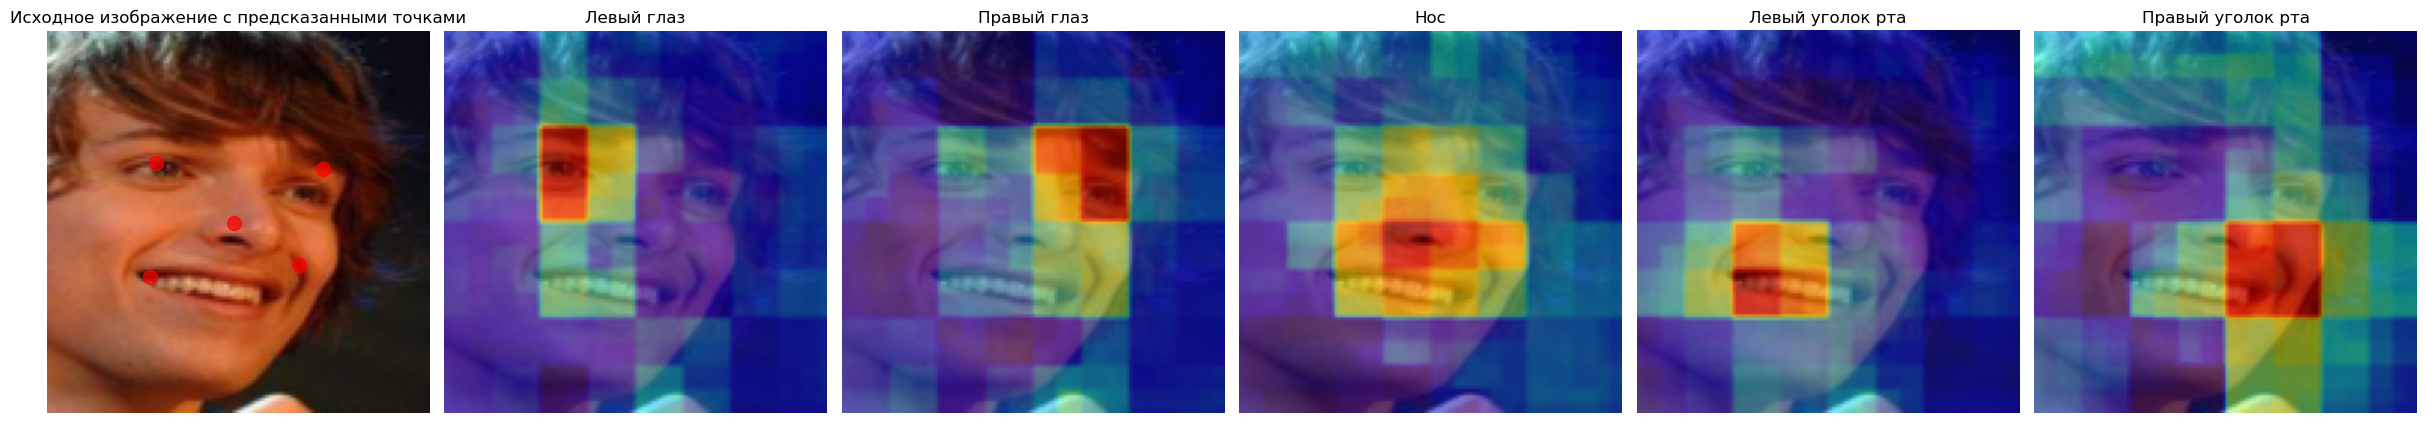

Эпоха 2/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0145
Loss: 0.0154
Loss: 0.0157
Loss: 0.0151
Loss: 0.0162
Loss: 0.0163
Loss: 0.0149
Loss: 0.0226
Loss: 0.0150
Loss: 0.0188
Loss: 0.0133
Loss: 0.0140
Loss: 0.0156
Loss: 0.0133
Loss: 0.0145
Loss: 0.0145
Loss: 0.0166
Loss: 0.0158
Loss: 0.0155
Loss: 0.0140
Loss: 0.0153
Loss: 0.0136
Loss: 0.0126
Loss: 0.0130
Loss: 0.0156
Loss: 0.0152
Loss: 0.0118
Loss: 0.0118
Loss: 0.0129
Loss: 0.0117
Loss: 0.0119
Loss: 0.0117
Loss: 0.0116
Loss: 0.0122
Loss: 0.0116
Loss: 0.0133
Loss: 0.0121
Loss: 0.0109
Loss: 0.0109
Loss: 0.0106
Loss: 0.0098
Loss: 0.0106
Loss: 0.0127
Loss: 0.0106
Loss: 0.0100
Loss: 0.0123
Loss: 0.0103
Loss: 0.0102
Loss: 0.0102
Loss: 0.0098
Loss: 0.0089
Loss: 0.0090
Loss: 0.0097
Loss: 0.0098
Loss: 0.0089
Loss: 0.0079
Loss: 0.0095
Loss: 0.0080
Loss: 0.0084
Loss: 0.0092
Loss: 0.0101
Loss: 0.0076
Loss: 0.0083
Loss: 0.0107
Loss: 0.0084
Loss: 0.0092
Loss: 0.0093
Loss: 0.0080
Loss: 0.0080
Loss: 0.0094
Loss: 0.0076
Loss: 0.0071
Loss: 0.0068
Loss: 0.0072
Loss: 0.0078
Loss: 0.0083
Loss: 0.0076

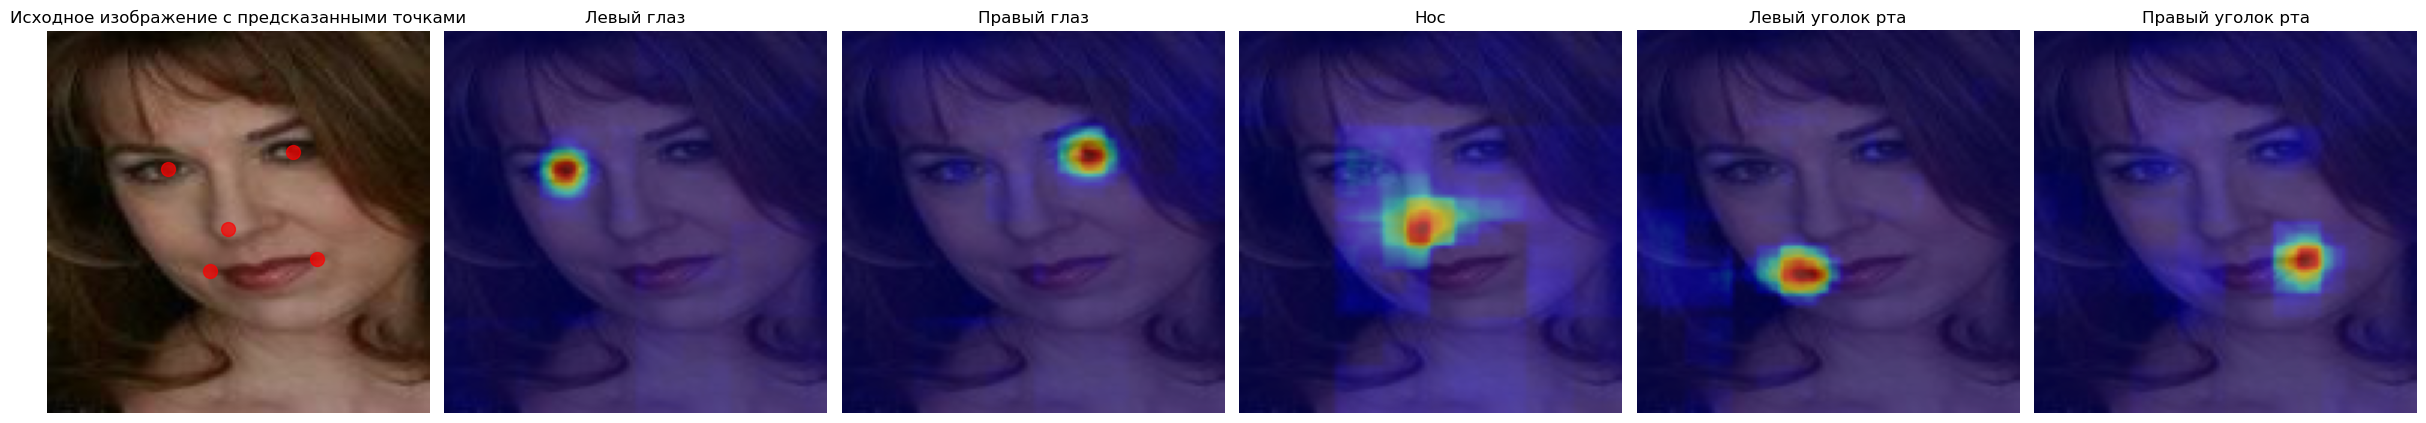

Эпоха 3/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0079
Loss: 0.0074
Loss: 0.0080
Loss: 0.0075
Loss: 0.0060
Loss: 0.0072
Loss: 0.0072
Loss: 0.0064
Loss: 0.0069
Loss: 0.0069
Loss: 0.0066
Loss: 0.0066
Loss: 0.0076
Loss: 0.0062
Loss: 0.0059
Loss: 0.0062
Loss: 0.0074
Loss: 0.0071
Loss: 0.0110
Loss: 0.0091
Loss: 0.0063
Loss: 0.0085
Loss: 0.0064
Loss: 0.0066
Loss: 0.0058
Loss: 0.0067
Loss: 0.0059
Loss: 0.0058
Loss: 0.0059
Loss: 0.0055
Loss: 0.0048
Loss: 0.0058
Loss: 0.0056
Loss: 0.0055
Loss: 0.0059
Loss: 0.0061
Loss: 0.0051
Loss: 0.0055
Loss: 0.0053
Loss: 0.0057
Loss: 0.0059
Loss: 0.0052
Loss: 0.0055
Loss: 0.0059
Loss: 0.0060
Loss: 0.0050
Loss: 0.0051
Loss: 0.0043
Loss: 0.0064
Loss: 0.0062
Loss: 0.0046
Loss: 0.0057
Loss: 0.0043
Loss: 0.0054
Loss: 0.0041
Loss: 0.0054
Loss: 0.0052
Loss: 0.0048
Loss: 0.0057
Loss: 0.0044
Loss: 0.0057
Loss: 0.0044
Loss: 0.0056
Loss: 0.0046
Loss: 0.0036
Loss: 0.0040
Loss: 0.0046
Loss: 0.0040
Loss: 0.0044
Loss: 0.0040
Loss: 0.0043
Loss: 0.0042
Loss: 0.0043
Loss: 0.0038
Loss: 0.0051
Loss: 0.0043
Loss: 0.0041

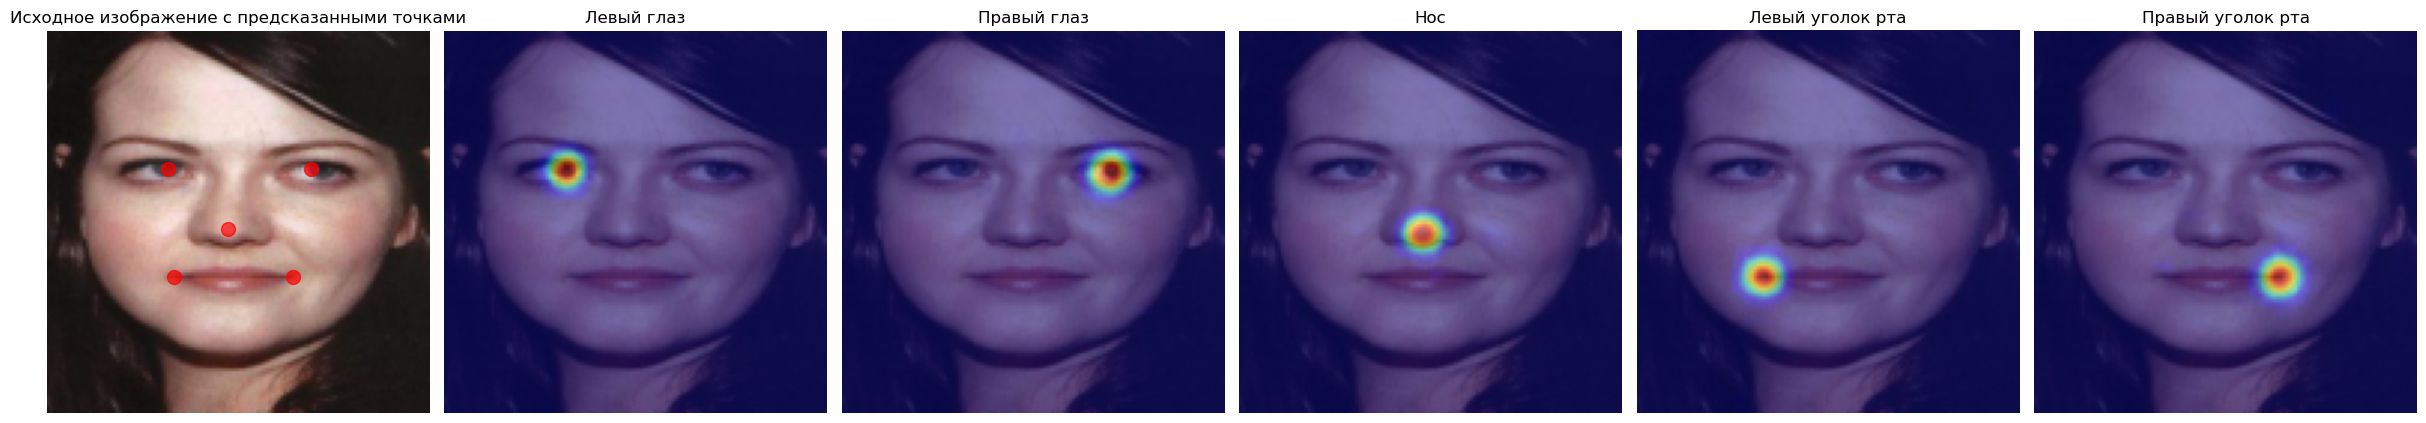

Эпоха 4/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0036
Loss: 0.0034
Loss: 0.0031
Loss: 0.0037
Loss: 0.0038
Loss: 0.0035
Loss: 0.0039
Loss: 0.0039
Loss: 0.0040
Loss: 0.0038
Loss: 0.0029
Loss: 0.0037
Loss: 0.0041
Loss: 0.0038
Loss: 0.0033
Loss: 0.0029
Loss: 0.0036
Loss: 0.0040
Loss: 0.0036
Loss: 0.0042
Loss: 0.0037
Loss: 0.0032
Loss: 0.0026
Loss: 0.0032
Loss: 0.0036
Loss: 0.0024
Loss: 0.0027
Loss: 0.0029
Loss: 0.0046
Loss: 0.0032
Loss: 0.0032
Loss: 0.0045
Loss: 0.0031
Loss: 0.0024
Loss: 0.0033
Loss: 0.0037
Loss: 0.0032
Loss: 0.0032
Loss: 0.0028
Loss: 0.0026
Loss: 0.0026
Loss: 0.0027
Loss: 0.0035
Loss: 0.0025
Loss: 0.0026
Loss: 0.0034
Loss: 0.0025
Loss: 0.0025
Loss: 0.0040
Loss: 0.0036
Loss: 0.0029
Loss: 0.0028
Loss: 0.0028
Loss: 0.0024
Loss: 0.0029
Loss: 0.0031
Loss: 0.0023
Loss: 0.0025
Loss: 0.0024
Loss: 0.0024
Loss: 0.0022
Loss: 0.0034
Loss: 0.0030
Loss: 0.0022
Loss: 0.0025
Loss: 0.0026
Loss: 0.0034
Loss: 0.0036
Loss: 0.0030
Loss: 0.0023
Loss: 0.0022
Loss: 0.0028
Loss: 0.0023
Loss: 0.0026
Loss: 0.0028
Loss: 0.0029
Loss: 0.0035

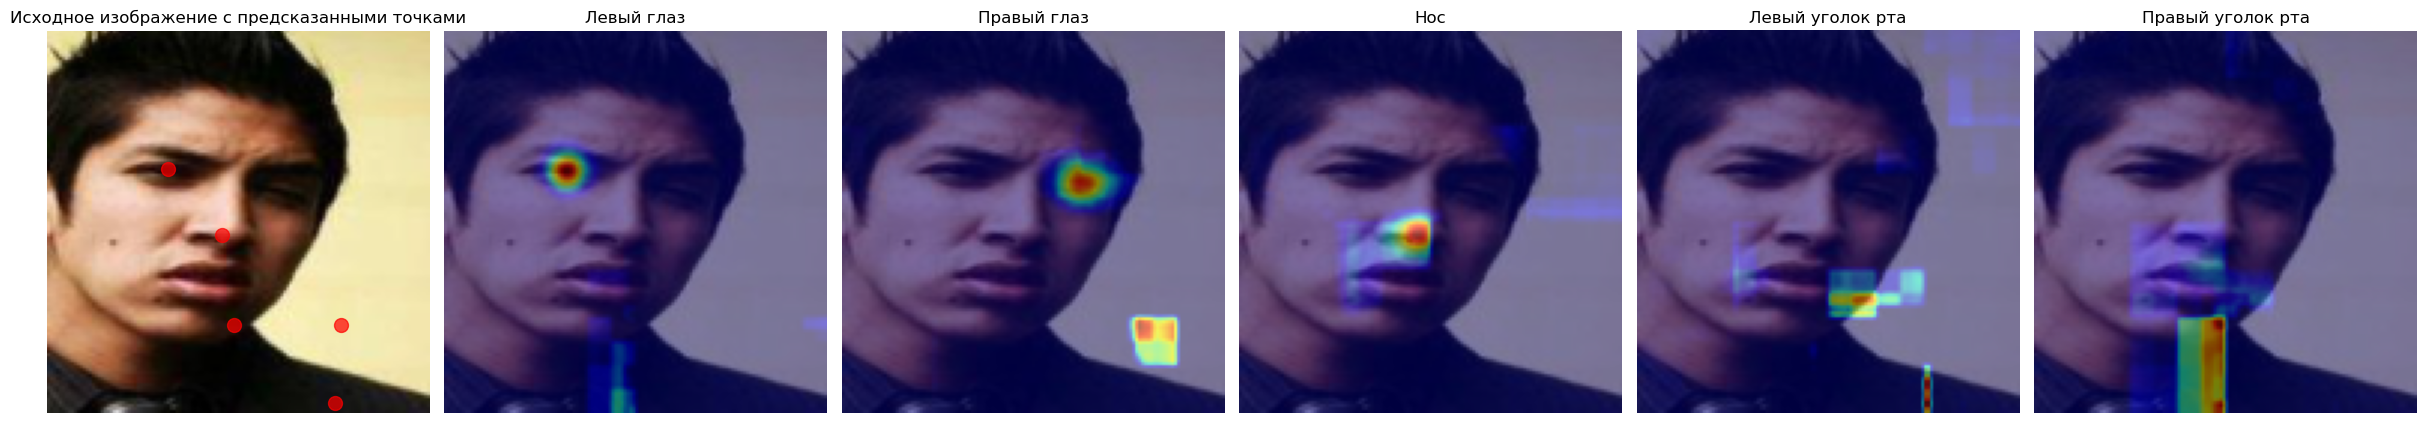

Эпоха 5/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0028
Loss: 0.0025
Loss: 0.0023
Loss: 0.0020
Loss: 0.0029
Loss: 0.0023
Loss: 0.0023
Loss: 0.0024
Loss: 0.0022
Loss: 0.0026
Loss: 0.0032
Loss: 0.0020
Loss: 0.0025
Loss: 0.0023
Loss: 0.0027
Loss: 0.0022
Loss: 0.0020
Loss: 0.0018
Loss: 0.0024
Loss: 0.0017
Loss: 0.0021
Loss: 0.0029
Loss: 0.0033
Loss: 0.0023
Loss: 0.0024
Loss: 0.0024
Loss: 0.0032
Loss: 0.0019
Loss: 0.0028
Loss: 0.0021
Loss: 0.0027
Loss: 0.0021
Loss: 0.0030
Loss: 0.0026
Loss: 0.0018
Loss: 0.0018
Loss: 0.0019
Loss: 0.0029
Loss: 0.0029
Loss: 0.0023
Loss: 0.0022
Loss: 0.0028
Loss: 0.0018
Loss: 0.0020
Loss: 0.0021
Loss: 0.0017
Loss: 0.0021
Loss: 0.0030
Loss: 0.0017
Loss: 0.0026
Loss: 0.0027
Loss: 0.0021
Loss: 0.0021
Loss: 0.0023
Loss: 0.0016
Loss: 0.0019
Loss: 0.0024
Loss: 0.0018
Loss: 0.0030
Loss: 0.0024
Loss: 0.0027
Loss: 0.0020
Loss: 0.0021
Loss: 0.0016
Loss: 0.0027
Loss: 0.0014
Loss: 0.0017
Loss: 0.0021
Loss: 0.0017
Loss: 0.0023
Loss: 0.0024
Loss: 0.0026
Loss: 0.0028
Loss: 0.0017
Loss: 0.0017
Loss: 0.0020
Loss: 0.0020

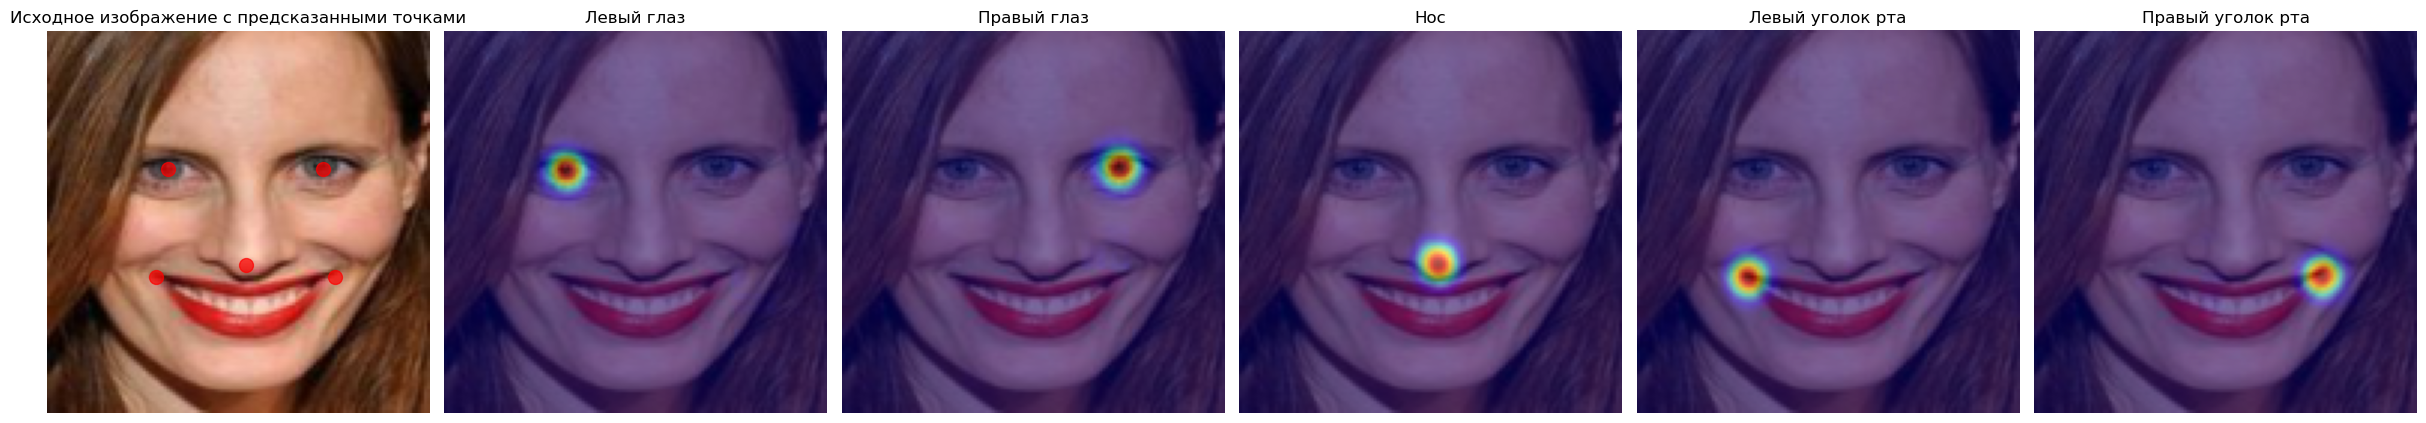

Эпоха 6/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0024
Loss: 0.0022
Loss: 0.0035
Loss: 0.0022
Loss: 0.0015
Loss: 0.0022
Loss: 0.0020
Loss: 0.0024
Loss: 0.0020
Loss: 0.0023
Loss: 0.0018
Loss: 0.0014
Loss: 0.0019
Loss: 0.0018
Loss: 0.0018
Loss: 0.0023
Loss: 0.0018
Loss: 0.0014
Loss: 0.0015
Loss: 0.0014
Loss: 0.0018
Loss: 0.0017
Loss: 0.0019
Loss: 0.0017
Loss: 0.0023
Loss: 0.0018
Loss: 0.0018
Loss: 0.0019
Loss: 0.0016
Loss: 0.0018
Loss: 0.0020
Loss: 0.0025
Loss: 0.0024
Loss: 0.0036
Loss: 0.0028
Loss: 0.0034
Loss: 0.0026
Loss: 0.0020
Loss: 0.0024
Loss: 0.0021
Loss: 0.0024
Loss: 0.0021
Loss: 0.0022
Loss: 0.0019
Loss: 0.0022
Loss: 0.0024
Loss: 0.0027
Loss: 0.0023
Loss: 0.0018
Loss: 0.0017
Loss: 0.0021
Loss: 0.0020
Loss: 0.0022
Loss: 0.0021
Loss: 0.0020
Loss: 0.0017
Loss: 0.0029
Loss: 0.0014
Loss: 0.0019
Loss: 0.0014
Loss: 0.0023
Loss: 0.0021
Loss: 0.0026
Loss: 0.0016
Loss: 0.0022
Loss: 0.0025
Loss: 0.0019
Loss: 0.0018
Loss: 0.0016
Loss: 0.0019
Loss: 0.0024
Loss: 0.0025
Loss: 0.0021
Loss: 0.0020
Loss: 0.0017
Loss: 0.0020
Loss: 0.0021

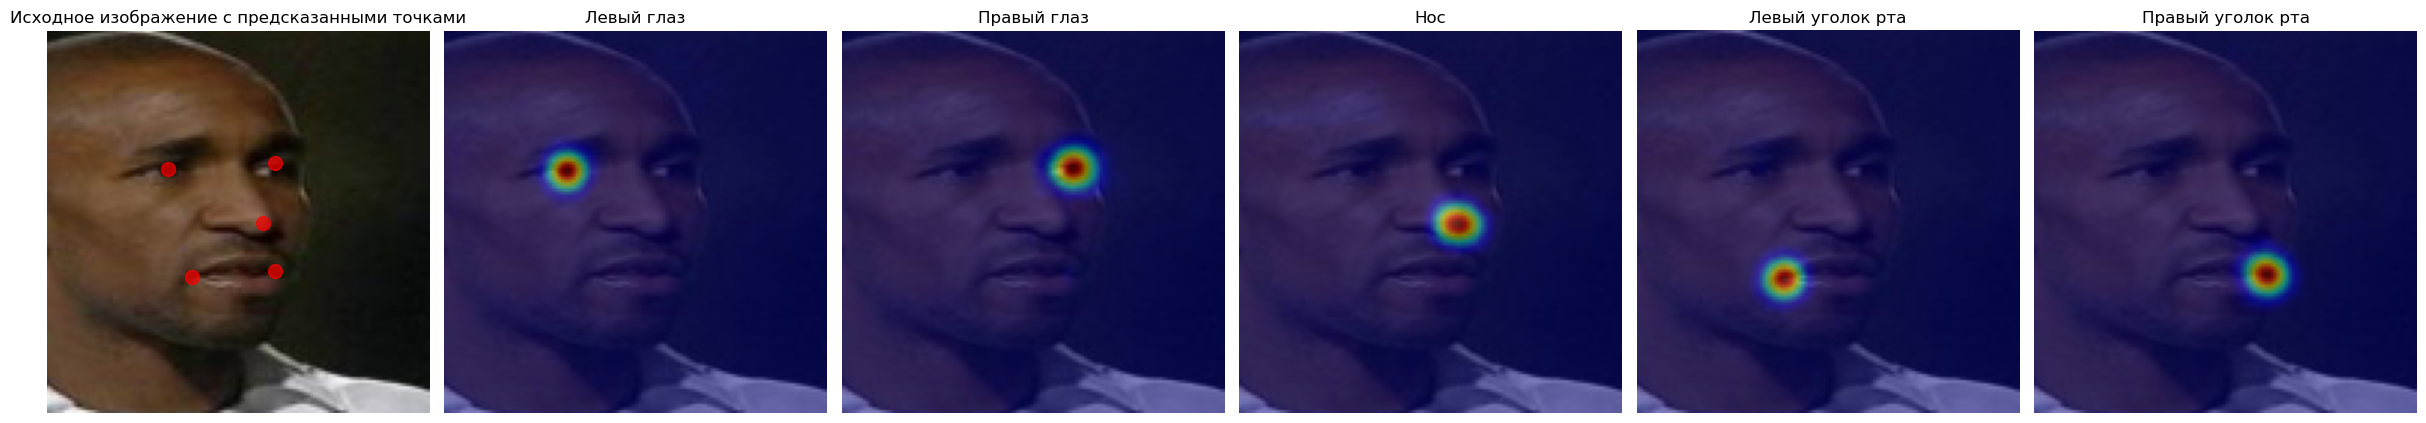

Эпоха 7/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0023
Loss: 0.0023
Loss: 0.0018
Loss: 0.0014
Loss: 0.0017
Loss: 0.0019
Loss: 0.0014
Loss: 0.0018
Loss: 0.0012
Loss: 0.0016
Loss: 0.0021
Loss: 0.0012
Loss: 0.0019
Loss: 0.0024
Loss: 0.0016
Loss: 0.0015
Loss: 0.0014
Loss: 0.0017
Loss: 0.0022
Loss: 0.0020
Loss: 0.0015
Loss: 0.0018
Loss: 0.0014
Loss: 0.0016
Loss: 0.0019
Loss: 0.0014
Loss: 0.0012
Loss: 0.0023
Loss: 0.0013
Loss: 0.0019
Loss: 0.0025
Loss: 0.0017
Loss: 0.0014
Loss: 0.0018
Loss: 0.0015
Loss: 0.0019
Loss: 0.0013
Loss: 0.0025
Loss: 0.0019
Loss: 0.0016
Loss: 0.0011
Loss: 0.0019
Loss: 0.0014
Loss: 0.0014
Loss: 0.0019
Loss: 0.0016
Loss: 0.0018
Loss: 0.0011
Loss: 0.0015
Loss: 0.0014
Loss: 0.0012
Loss: 0.0016
Loss: 0.0017
Loss: 0.0013
Loss: 0.0014
Loss: 0.0024
Loss: 0.0018
Loss: 0.0015
Loss: 0.0014
Loss: 0.0020
Loss: 0.0016
Loss: 0.0016
Loss: 0.0012
Loss: 0.0012
Loss: 0.0014
Loss: 0.0016
Loss: 0.0020
Loss: 0.0016
Loss: 0.0016
Loss: 0.0014
Loss: 0.0015
Loss: 0.0022
Loss: 0.0023
Loss: 0.0025
Loss: 0.0013
Loss: 0.0016
Loss: 0.0013

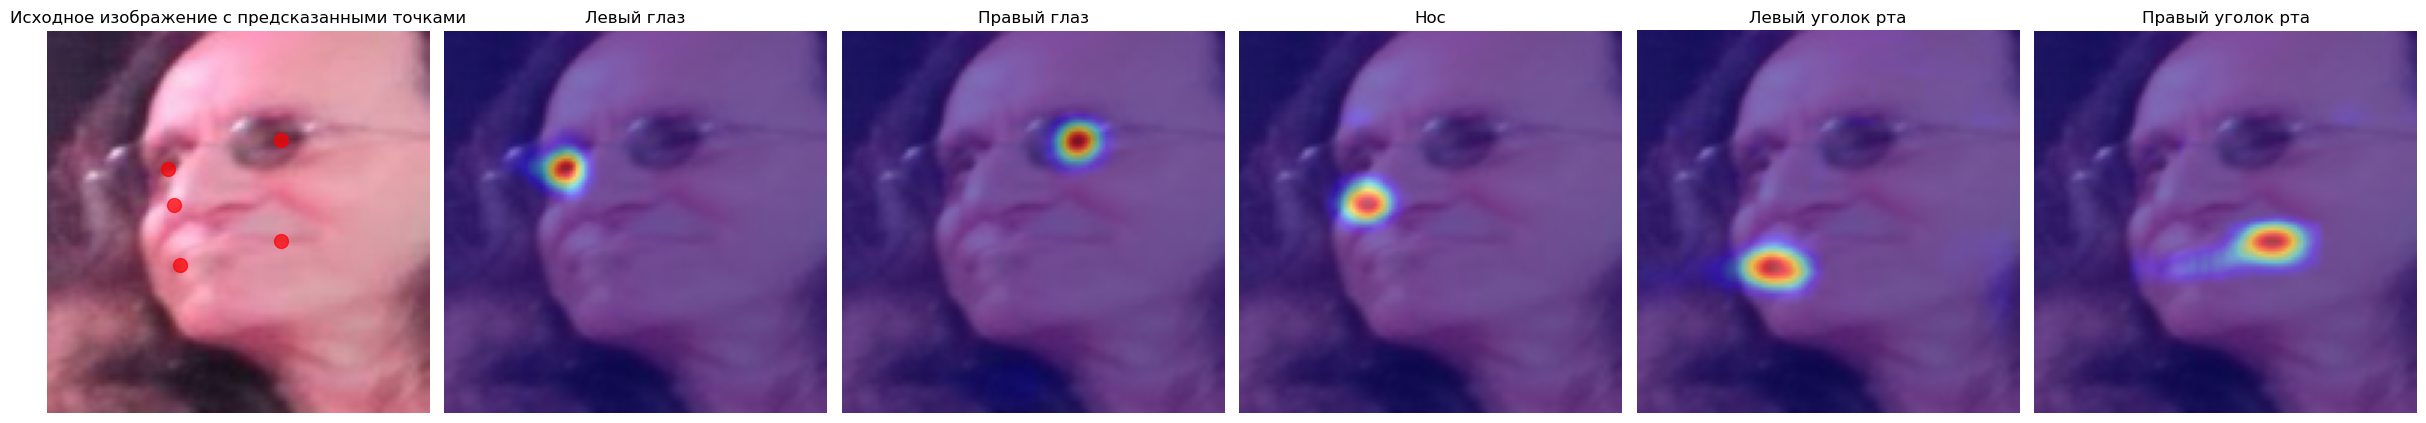

Эпоха 8/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0013
Loss: 0.0016
Loss: 0.0017
Loss: 0.0012
Loss: 0.0015
Loss: 0.0014
Loss: 0.0009
Loss: 0.0026
Loss: 0.0016
Loss: 0.0017
Loss: 0.0011
Loss: 0.0016
Loss: 0.0009
Loss: 0.0011
Loss: 0.0014
Loss: 0.0018
Loss: 0.0017
Loss: 0.0016
Loss: 0.0018
Loss: 0.0014
Loss: 0.0013
Loss: 0.0015
Loss: 0.0017
Loss: 0.0020
Loss: 0.0016
Loss: 0.0014
Loss: 0.0015
Loss: 0.0014
Loss: 0.0012
Loss: 0.0016
Loss: 0.0013
Loss: 0.0011
Loss: 0.0013
Loss: 0.0015
Loss: 0.0015
Loss: 0.0013
Loss: 0.0011
Loss: 0.0016
Loss: 0.0014
Loss: 0.0017
Loss: 0.0015
Loss: 0.0016
Loss: 0.0015
Loss: 0.0018
Loss: 0.0013
Loss: 0.0017
Loss: 0.0016
Loss: 0.0020
Loss: 0.0021
Loss: 0.0014
Loss: 0.0011
Loss: 0.0014
Loss: 0.0010
Loss: 0.0009
Loss: 0.0014
Loss: 0.0012
Loss: 0.0015
Loss: 0.0018
Loss: 0.0020
Loss: 0.0014
Loss: 0.0016
Loss: 0.0012
Loss: 0.0020
Loss: 0.0016
Loss: 0.0014
Loss: 0.0015
Loss: 0.0015
Loss: 0.0017
Loss: 0.0018
Loss: 0.0010
Loss: 0.0015
Loss: 0.0009
Loss: 0.0013
Loss: 0.0013
Loss: 0.0013
Loss: 0.0016
Loss: 0.0019

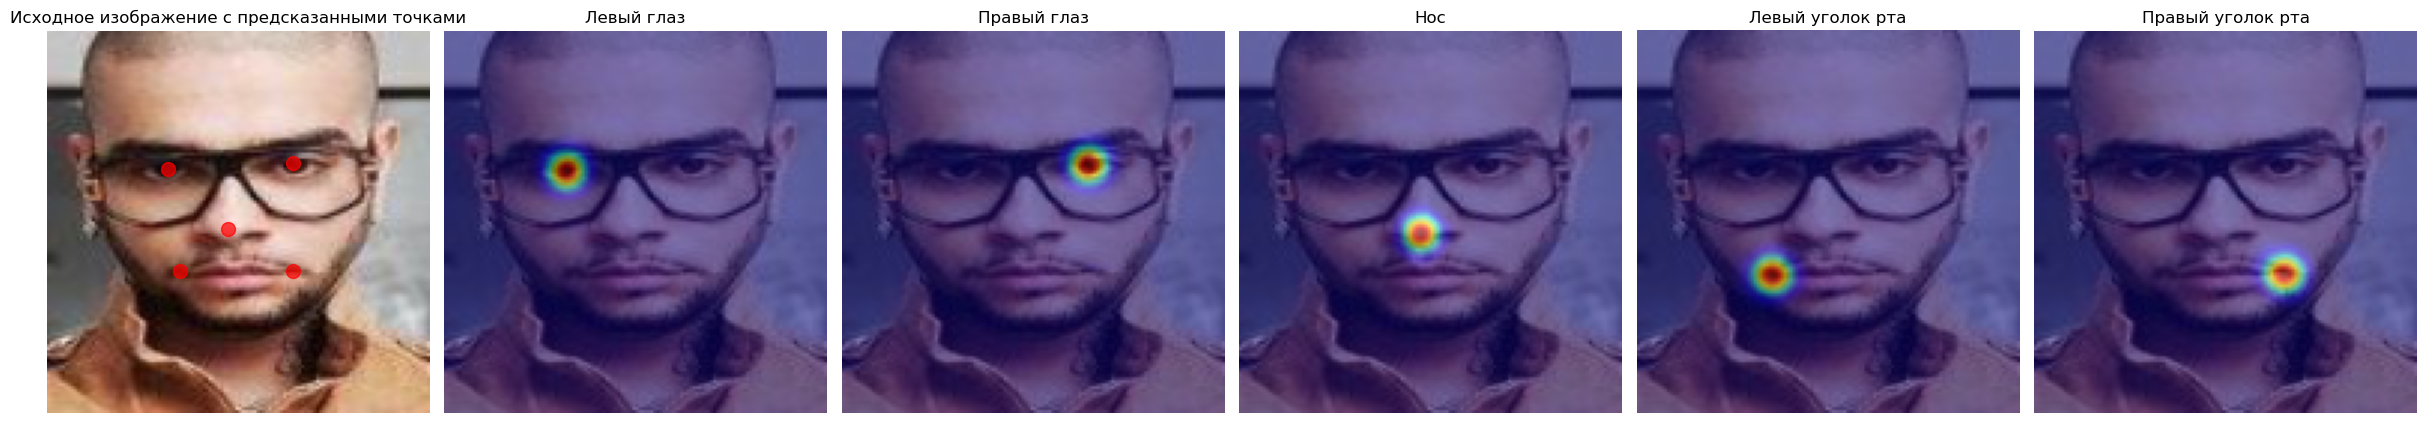

Эпоха 9/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0011
Loss: 0.0013
Loss: 0.0012
Loss: 0.0015
Loss: 0.0013
Loss: 0.0017
Loss: 0.0014
Loss: 0.0013
Loss: 0.0013
Loss: 0.0013
Loss: 0.0015
Loss: 0.0011
Loss: 0.0011
Loss: 0.0009
Loss: 0.0014
Loss: 0.0013
Loss: 0.0012
Loss: 0.0013
Loss: 0.0009
Loss: 0.0008
Loss: 0.0012
Loss: 0.0020
Loss: 0.0015
Loss: 0.0012
Loss: 0.0008
Loss: 0.0012
Loss: 0.0016
Loss: 0.0021
Loss: 0.0017
Loss: 0.0015
Loss: 0.0014
Loss: 0.0014
Loss: 0.0013
Loss: 0.0009
Loss: 0.0014
Loss: 0.0011
Loss: 0.0009
Loss: 0.0015
Loss: 0.0012
Loss: 0.0011
Loss: 0.0016
Loss: 0.0013
Loss: 0.0010
Loss: 0.0013
Loss: 0.0015
Loss: 0.0011
Loss: 0.0021
Loss: 0.0014
Loss: 0.0011
Loss: 0.0012
Loss: 0.0018
Loss: 0.0012
Loss: 0.0014
Loss: 0.0014
Loss: 0.0014
Loss: 0.0015
Loss: 0.0011
Loss: 0.0016
Loss: 0.0015
Loss: 0.0013
Loss: 0.0013
Loss: 0.0013
Loss: 0.0012
Loss: 0.0012
Loss: 0.0012
Loss: 0.0014
Loss: 0.0019
Loss: 0.0009
Loss: 0.0015
Loss: 0.0014
Loss: 0.0016
Loss: 0.0017
Loss: 0.0012
Loss: 0.0010
Loss: 0.0012
Loss: 0.0017
Loss: 0.0014

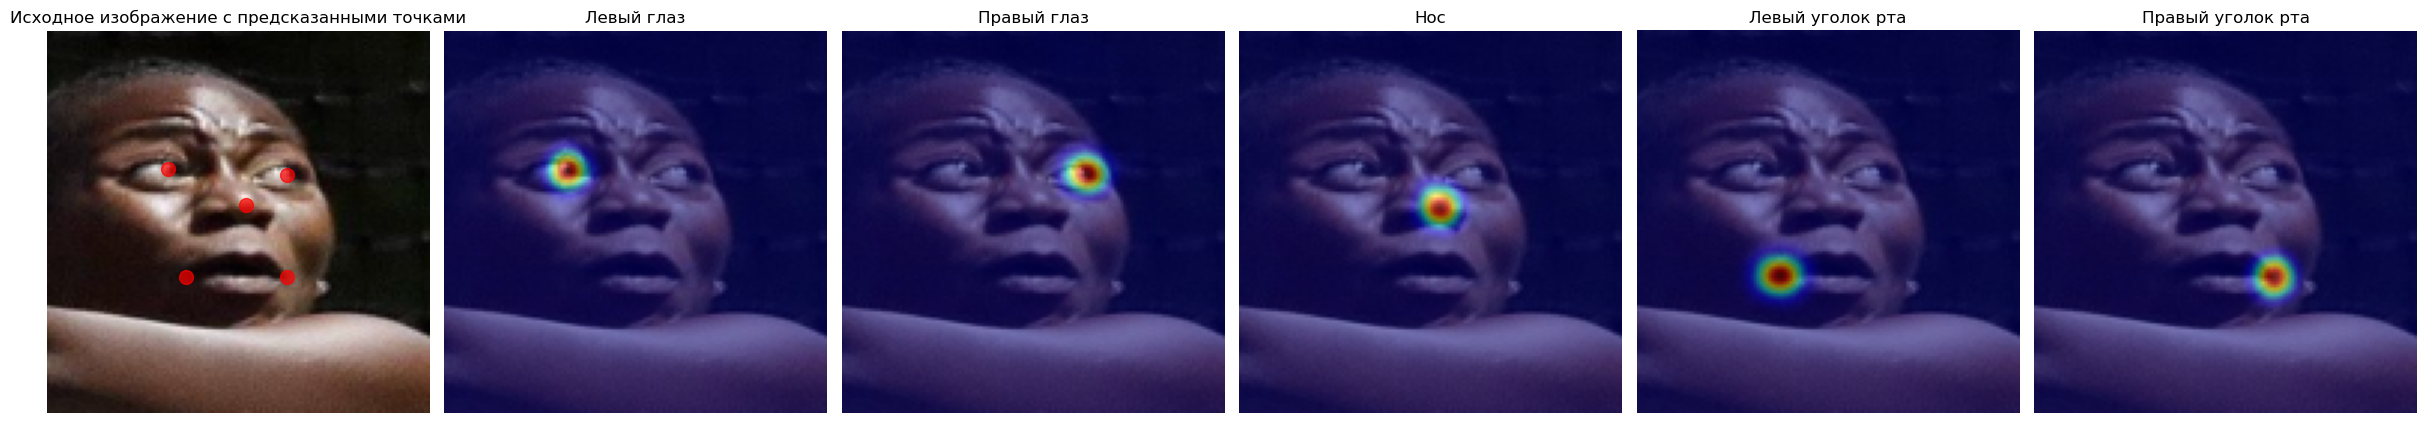

Эпоха 10/10:   0%|          | 0/937 [00:00<?, ?it/s]

Loss: 0.0013
Loss: 0.0009
Loss: 0.0010
Loss: 0.0013
Loss: 0.0012
Loss: 0.0010
Loss: 0.0012
Loss: 0.0008
Loss: 0.0017
Loss: 0.0010
Loss: 0.0010
Loss: 0.0009
Loss: 0.0010
Loss: 0.0014
Loss: 0.0016
Loss: 0.0013
Loss: 0.0012
Loss: 0.0012
Loss: 0.0018
Loss: 0.0017
Loss: 0.0015
Loss: 0.0008
Loss: 0.0012
Loss: 0.0008
Loss: 0.0012
Loss: 0.0015
Loss: 0.0013
Loss: 0.0014
Loss: 0.0016
Loss: 0.0015
Loss: 0.0011
Loss: 0.0018
Loss: 0.0012
Loss: 0.0011
Loss: 0.0012
Loss: 0.0016
Loss: 0.0015
Loss: 0.0013
Loss: 0.0010
Loss: 0.0021
Loss: 0.0014
Loss: 0.0016
Loss: 0.0013
Loss: 0.0014
Loss: 0.0011
Loss: 0.0009
Loss: 0.0010
Loss: 0.0014
Loss: 0.0015
Loss: 0.0013
Loss: 0.0012
Loss: 0.0013
Loss: 0.0013
Loss: 0.0012
Loss: 0.0014
Loss: 0.0012
Loss: 0.0015
Loss: 0.0014
Loss: 0.0013
Loss: 0.0011
Loss: 0.0011
Loss: 0.0013
Loss: 0.0018
Loss: 0.0016
Loss: 0.0010
Loss: 0.0011
Loss: 0.0009
Loss: 0.0009
Loss: 0.0009
Loss: 0.0014
Loss: 0.0011
Loss: 0.0013
Loss: 0.0012
Loss: 0.0011
Loss: 0.0014
Loss: 0.0010
Loss: 0.0013

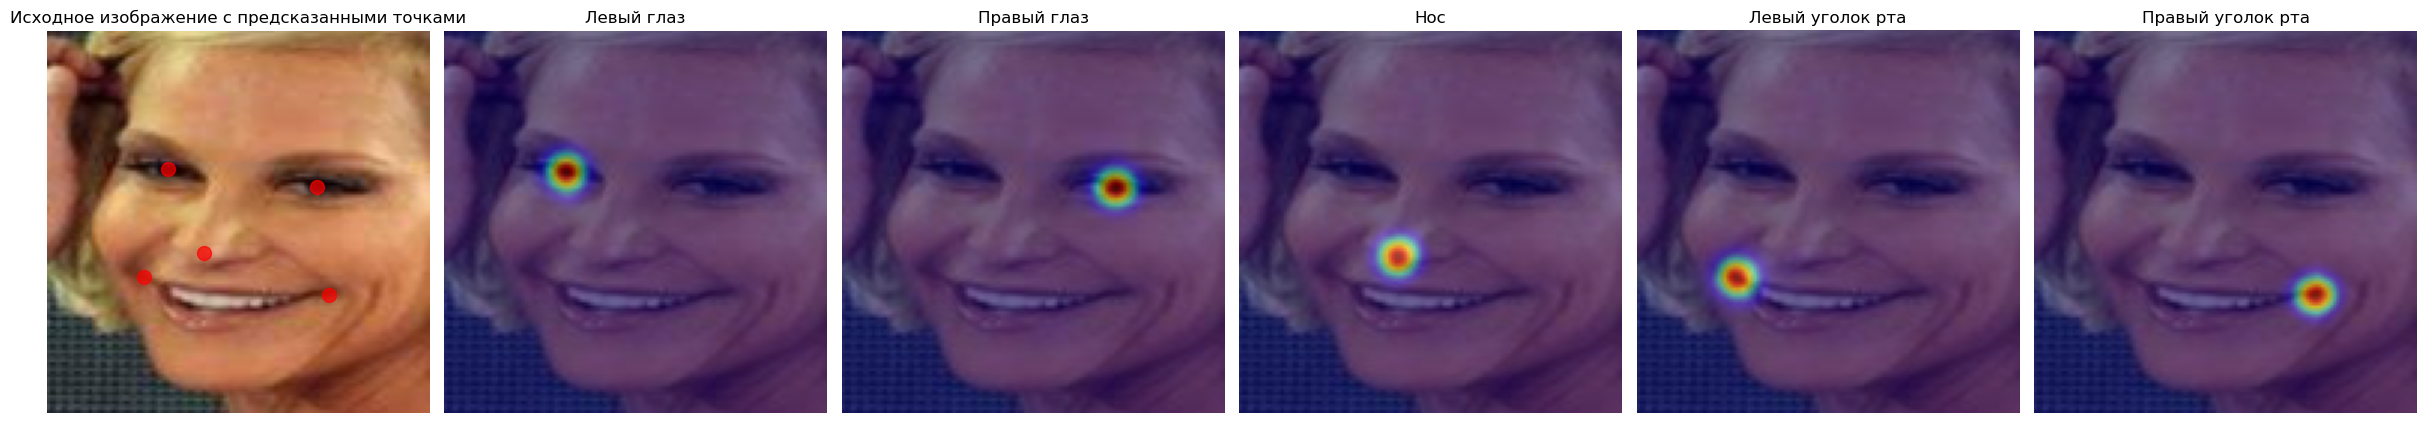

Обучение завершено!
Модель обучена. Лучшие параметры сохранены в 'PROJECT/FaceAlignment/best_landmark_model.pth'


In [ ]:
# Параметры тренировки
num_epochs = 10
display_frequency = 1

loss_history = train_model(model, dataloader, num_epochs, device, learning_rate=1e-4, display_frequency=display_frequency)

print(f"Модель обучена. Лучшие параметры сохранены в '{project_path}/best_landmark_model.pth'")

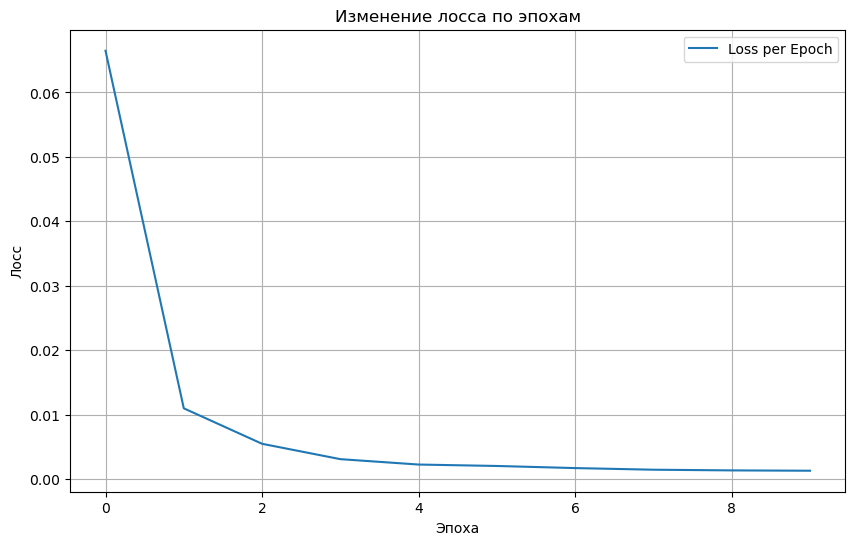

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss per Epoch')
plt.title('Изменение лосса по эпохам')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [173]:
import cv2

def face_align(image_np, landmarks, target_size=(128, 128), target_left_eye=(0.28, 0.35), target_right_eye=(0.72, 0.35), target_mouth_y=0.75):
    """
    Выполняет выравнивание лица на изображении на основе лицевых ориентиров с использованием аффинного преобразования.

    Аргументы:
        image_np (np.array): Входное изображение в виде массива NumPy (H, W, C).
        landmarks (np.array): Массив NumPy размером (5, 2), содержащий (x, y)
                              координаты 5 лицевых ориентиров в следующем порядке:
                              [левый_глаз, правый_глаз, нос, левый_угол_рта, правый_угол_рта].
        target_size (tuple): Желаемый размер выходного изображения (ширина, высота).
        target_left_eye (tuple): Нормализованные (x, y) координаты для левого глаза на целевом изображении.
        target_right_eye (tuple): Нормализованные (x, y) координаты для правого глаза на целевом изображении.
        target_mouth_y (float): Нормализованная y-координата для центра рта на целевом изображении.

    Возвращает:
        np.array: Выровненное и измененное изображение лица.
        np.array: Матрица аффинного преобразования 2x3 M.
    """

    # Убедиться, что image_np имеет правильный формат (например, uint8)
    if image_np.dtype != np.uint8:
        image_np = (image_np * 255).astype(np.uint8)

    # Преобразовать ориентиры в массив numpy, если это еще не так
    landmarks = np.array(landmarks, dtype=np.float32)

    # Извлечь ключевые ориентиры для аффинного преобразования (координаты ориентиров)
    left_eye = landmarks[0]
    right_eye = landmarks[1]
    left_mouth = landmarks[3]
    right_mouth = landmarks[4]

    # Вычислить центр рта
    mouth_center = ((left_mouth[0] + right_mouth[0]) / 2, (left_mouth[1] + right_mouth[1]) / 2)

    # Определить исходные точки (из входного изображения)
    # Используем левый глаз, правый глаз и центр рта
    src_pts = np.array([
        left_eye,
        right_eye,
        mouth_center
    ], dtype=np.float32)

    # Определить целевые точки (на целевом изображении) на основе target_size и нормализованных координат
    # Преобразовать нормализованные координаты в абсолютные значения пикселей
    target_width, target_height = target_size
    dst_left_eye = (int(target_left_eye[0] * target_width), int(target_left_eye[1] * target_height))
    dst_right_eye = (int(target_right_eye[0] * target_width), int(target_right_eye[1] * target_height))
    dst_mouth_center = (int((target_left_eye[0] + target_right_eye[0]) / 2 * target_width), int(target_mouth_y * target_height))

    dst_pts = np.array([
        dst_left_eye,
        dst_right_eye,
        dst_mouth_center
    ], dtype=np.float32)

    # Вычислить матрицу аффинного преобразования
    M, _ = cv2.estimateAffinePartial2D(src_pts, dst_pts)

    # Применить аффинное преобразование к изображению
    aligned_face = cv2.warpAffine(image_np, M, target_size, flags=cv2.INTER_LINEAR)

    return aligned_face, M


In [214]:
def show_aligned_faces(num_images=5):
    # Загрузить обученную модель
    model.load_state_dict(torch.load(f'{project_path}/best_landmark_model.pth'))
    model.eval()

    fig, axes = plt.subplots(2, num_images, figsize=(num_images * 4, 8))
    axes = axes.flatten()

    # Входной тензор изображения имеет фиксированные размеры H_img, W_img.
    H_img, W_img = 128, 128

    # Определить целевые позиции лэндмарков для выровненного изображения
    target_size = (128, 128)
    target_left_eye = (0.28, 0.35)
    target_right_eye = (0.72, 0.35)
    target_mouth_y = 0.75

    target_width, target_height = target_size
    # Пересчитать целевые точки для построения графика на выровненном изображении
    dst_left_eye = (int(target_left_eye[0] * target_width), int(target_left_eye[1] * target_height))
    dst_right_eye = (int(target_right_eye[0] * target_width), int(target_right_eye[1] * target_height))
    dst_mouth_center = (int((target_left_eye[0] + target_right_eye[0]) / 2 * target_width), int(target_mouth_y * target_height))

    aligned_image_target_landmarks = np.array([
        dst_left_eye,
        dst_right_eye,
        dst_mouth_center
    ], dtype=np.float32)

    processed_images_count = 0
    for batch_data in dataloader:
        if processed_images_count >= num_images:
            break
        if batch_data is None:
            continue

        images, _, true_landmarks_batch = batch_data # true_landmarks_batch масштабируются до размера входного изображения (128x128)

        # Взять один образец из батча
        sample_image_tensor = images[0].unsqueeze(0).to(device) # Добавить размер батча и переместить на устройство

        original_image_np = (sample_image_tensor.squeeze(0).cpu().numpy().transpose(1, 2, 0) *
                            np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
        original_image_np = original_image_np.astype(np.uint8)

        # Получить предсказанные хитмапы и преобразовать их в лэндмарки
        with torch.no_grad():
            output_heatmaps_list = model(sample_image_tensor)
            predicted_heatmaps = output_heatmaps_list[-1]

        # Предсказанные тепловые карты имеют размер 64x64, поэтому H_hm, W_hm равны 64
        H_hm, W_hm = predicted_heatmaps.shape[2:]
        scale_x = W_img / W_hm
        scale_y = H_img / H_hm

        predicted_landmarks_hm = heatmaps_to_landmarks(predicted_heatmaps.cpu()).squeeze(0).numpy()
        predicted_landmarks_scaled = predicted_landmarks_hm * np.array([scale_x, scale_y])

        # Выполнить выравнивание лица, получить выровненное изображение И матрицу преобразования M
        aligned_image, M = face_align(original_image_np, predicted_landmarks_scaled)

        # Преобразовать все 5 предсказанных лэндмарков с использованием полученной аффинной матрицы M
        # OpenCV ожидает точки в формате (N, 1, 2) для perspectiveTransform/transform
        # Для аффинного преобразования можно использовать cv2.transform непосредственно на (N, 2), если добавить 1
        # Или проще, применить матрицу вручную:
        transformed_predicted_landmarks = []
        for lx, ly in predicted_landmarks_scaled:
            transformed_x = M[0, 0] * lx + M[0, 1] * ly + M[0, 2]
            transformed_y = M[1, 0] * lx + M[1, 1] * ly + M[1, 2]
            transformed_predicted_landmarks.append((transformed_x, transformed_y))
        transformed_predicted_landmarks = np.array(transformed_predicted_landmarks, dtype=np.float32)

        # Отобразить исходное изображение с предсказанными лэндмарками
        ax_orig = axes[processed_images_count]
        ax_orig.imshow(original_image_np)
        ax_orig.set_title(f"Оригинальное изображение {processed_images_count + 1}")
        ax_orig.axis('off')
        ax_orig.scatter(predicted_landmarks_scaled[:, 0], predicted_landmarks_scaled[:, 1],
                        c='red', s=50, marker='o', alpha=0.8, label='Предсказанные')

        # Отобразить выровненное изображение с целевыми лэндмарками и преобразованными предсказанными лэндмарками
        ax_aligned = axes[processed_images_count + num_images]
        ax_aligned.imshow(aligned_image)
        ax_aligned.set_title(f"Выровненное {processed_images_count + 1}")
        ax_aligned.axis('off')

        # Построить 3 целевых лэндмарка на выровненном изображении
        ax_aligned.scatter(aligned_image_target_landmarks[:, 0], aligned_image_target_landmarks[:, 1],
                           c='lime', s=50, marker='x', alpha=0.8, label='Целевые')

        # Построить все 5 преобразованных предсказанных лэндмарков на выровненном изображении
        ax_aligned.scatter(transformed_predicted_landmarks[:, 0], transformed_predicted_landmarks[:, 1],
                           c='blue', s=30, marker='+', alpha=0.8, label='Предсказанные')

        processed_images_count += 1

    plt.tight_layout()
    plt.show()

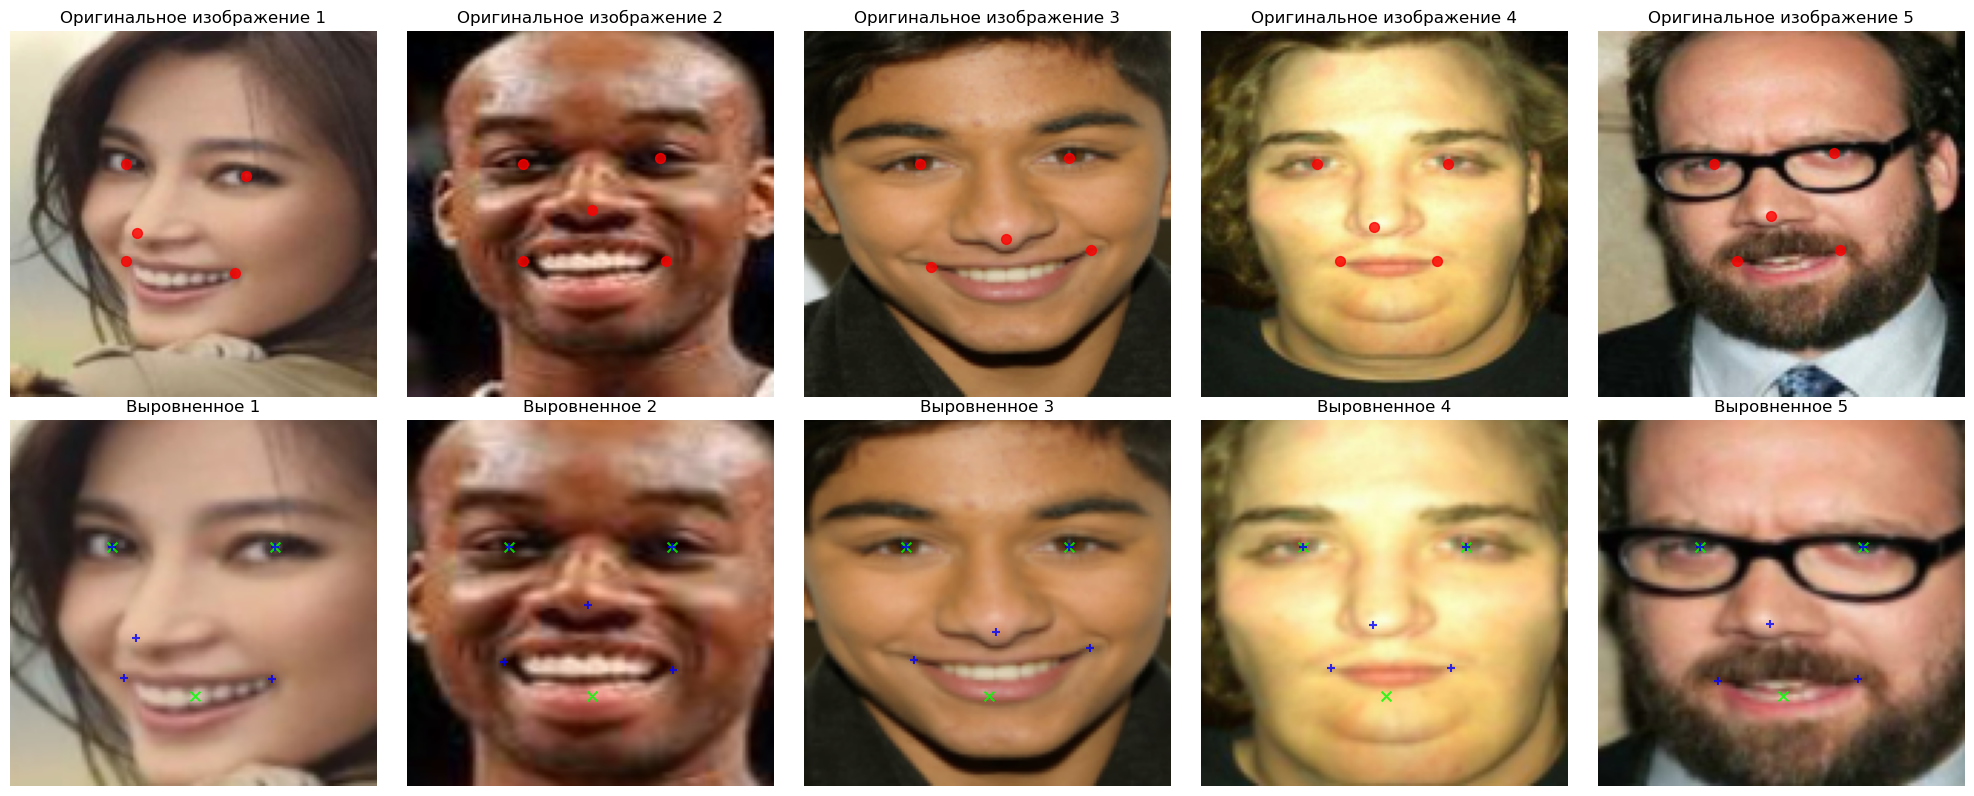

In [215]:
show_aligned_faces()

In [216]:
import os

aligned_images_path = os.path.join(project_path, 'aligned_images')
os.makedirs(aligned_images_path, exist_ok=True)
print(f"Папка '{os.path.basename(aligned_images_path)}' создана или уже существует по пути: {aligned_images_path}")

Папка 'aligned_images' создана или уже существует по пути: PROJECT/FaceAlignment/aligned_images


In [217]:
def prepare_aligned_dataset(model, dataloader, aligned_images_path, target_size=(128, 128)):
    """
    Подготавливает датасет с кропнутыми и выровненными лицами.

    :param model: Обученная модель Stacked Hourglass Network.
    :param dataloader: DataLoader для датасета.
    :param aligned_images_path: Путь к директории для сохранения выровненных изображений.
    :param target_size: Желаемый размер выходного выровненного изображения.
    """
    model.eval() # Переводим модель в режим оценки
    processed_images_count = 0
    device = next(model.parameters()).device # Определяем устройство модели

    for batch_data in tqdm(dataloader, desc="Выравнивание и сохранение изображений"):
        if batch_data is None:
            continue

        images, _, _ = batch_data
        images = images.to(device) # Перемещаем батч на устройство

        with torch.no_grad():
            output_heatmaps_list = model(images)
            predicted_heatmaps_batch = output_heatmaps_list[-1]

        # Predicted heatmaps are 64x64, input images are 128x128
        H_hm, W_hm = predicted_heatmaps_batch.shape[2:] # 64, 64
        H_img, W_img = images.shape[2:] # 128, 128
        scale_x = W_img / W_hm
        scale_y = H_img / H_hm

        # Process each image in the batch
        for i in range(images.shape[0]):
            image_tensor = images[i]
            predicted_heatmaps = predicted_heatmaps_batch[i].unsqueeze(0) # [1, num_landmarks, H_hm, W_hm]

            # Convert heatmaps to landmarks and scale them to original image size (128x128)
            predicted_landmarks_hm = heatmaps_to_landmarks(predicted_heatmaps.cpu()).squeeze(0).numpy()
            predicted_landmarks_scaled = predicted_landmarks_hm * np.array([scale_x, scale_y])

            # Denormalize image for alignment (face_align expects uint8)
            mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
            std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
            image_np = image_tensor.cpu().numpy() * std + mean
            image_np = np.clip(image_np.transpose(1, 2, 0) * 255, 0, 255).astype(np.uint8)

            # Perform face alignment
            aligned_face, _ = face_align(image_np, predicted_landmarks_scaled, target_size=target_size)

            # Save aligned face
            image_filename = dataloader.dataset.df.iloc[processed_images_count]['image_id'] # Get original filename
            save_path = os.path.join(aligned_images_path, image_filename)
            Image.fromarray(aligned_face).save(save_path)

            processed_images_count += 1

    print(f"Сохранено {processed_images_count} выровненных изображений в {aligned_images_path}")

# Call the function to prepare the aligned dataset
# Ensure model is loaded with best weights
model.load_state_dict(torch.load(f'{project_path}/best_landmark_model.pth'))

prepare_aligned_dataset(model, dataloader, aligned_images_path, target_size=fixed_image_size)


Начинаем подготовку выровненного датасета...


Выравнивание и сохранение изображений:   0%|          | 0/937 [00:00<?, ?it/s]

Сохранено 14980 выровненных изображений в PROJECT/FaceAlignment/aligned_images
